<h2 style="color:darkblue;">In This Notebook</h2>
<ul>
    <li>Data Exploration</li>
    <li>Data Cleaning (missing values, outliers, skewness)</li>
    <li>Data Analysis and Visualization</li>
    <li>Notes and Insights About the Data</li>
    <li>Data Preprocessing for Machine Learning Model</li>
    <li>Prediction Model (test with about 10 models and pick the best)</li>
</ul>


<h1 style="color:darkred;">Import basic libraries</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np


<h1 style="color:darkred;">Read the Data</h1>

In [2]:
data= pd.read_csv("IEEE.csv")
data

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006.0,Developing,123.0,8,0.97,122.652333,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
1,1,Croatia,2006.0,Developed,113.0,0,11.83,1555.651986,NaN,1.0,58.1,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,75.9
2,2,Montenegro,2007.0,Developing,125.0,0,4.98,678.518894,9.0,0.0,57.2,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,74.2
3,3,Bahrain,2014.0,Developing,7.0,0,1.57,367.255674,98.0,46.0,62.9,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,76.8
4,4,Kenya,2000.0,Developing,428.0,77,1.51,0.681686,NaN,21002.0,14.4,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,51.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Malta,2011.0,Developed,59.0,0,6.91,3601.287457,82.0,3.0,68.0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,87.0
2934,2934,Guinea-Bissau,2010.0,Developing,287.0,4,3.21,53.307827,83.0,26.0,23.1,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,56.7
2935,2935,Haiti,2007.0,Developing,266.0,17,6.08,56.778587,NaN,0.0,4.7,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,61.8
2936,2936,Italy,2003.0,Developed,72.0,2,9.30,3519.258515,95.0,10982.0,57.0,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,79.9


<h1 style="color:darkred;">Schema to understand the Data</h1>

| **Feature**                    | **Description**                                                                                   |
|---------------------------------|---------------------------------------------------------------------------------------------------|
| **Unnamed: 0**                  | An index or unique identifier for the rows in the dataset, often auto-generated.                  |
| **Nation**                      | The name of the nation or country corresponding to the data entry.                               |
| **Survey_Year**                 | The year when the survey or data collection occurred.                                             |
| **Country_Category**            | The economic or regional classification of the country (e.g., 'Developing', 'Developed').         |
| **Mortality_Adults**            | The adult mortality rate per 1000 adults aged 15-60.                                               |
| **Infant_Deaths_Count**         | The total number of infant (children under 1 year) deaths per year.                               |
| **Alcohol_Consumption_Rate**    | The per capita alcohol consumption rate in liters per year.                                       |
| **Expenditure_Percentage_GDP**  | The percentage of the Gross Domestic Product (GDP) spent on health.                               |
| **Hepatitis_B_Vaccination_Coverage** | The percentage of the population vaccinated against Hepatitis B (التهاب الكبد B).               |
| **Measles_Infection_Count**     | The total number of reported measles cases (الحصبة).                                              |
| **Body_Mass_Index_Avg**         | The average body mass index (BMI) of the population.                                              |
| **Polio_Vaccination_Coverage**  | The percentage of the population vaccinated against Polio (تطعيم شلل الاطفال).                   |
| **Total_Health_Expenditure**    | The total health expenditure per capita (in USD).                                                |
| **Diphtheria_Vaccination_Coverage** | The percentage of the population vaccinated against Diphtheria (الديفيتريا).                  |
| **HIV_AIDS_Prevalence_Rate**    | The prevalence rate of HIV/AIDS in the population as a percentage (الايدز).                       |
| **Gross_Domestic_Product**      | The Gross Domestic Product (GDP) per capita (in USD).                                             |
| **Total_Population**            | The total population of the country.                                                             |
| **Thinness**                    | The percentage of the population classified as thin (low BMI).                                   |
| **Life_Expectancy_Years**       | The average number of years a person is expected to live.                                         |


<h1 style="color:darkred;">Data Exploration</h1>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2938 non-null   int64  
 1   Nation                            2937 non-null   object 
 2   Survey_Year                       2936 non-null   float64
 3   Country_Category                  2935 non-null   object 
 4   Mortality_Adults                  2925 non-null   float64
 5   Infant_Deaths_Count               2938 non-null   int64  
 6   Alcohol_Consumption_Rate          2744 non-null   float64
 7   Expenditure_Percentage_GDP        2938 non-null   float64
 8   Hepatitis_B_Vaccination_Coverage  2385 non-null   float64
 9   Measles_Infection_Count           2936 non-null   float64
 10  Body_Mass_Index_Avg               2904 non-null   float64
 11  Polio_Vaccination_Coverage        2919 non-null   float64
 12  Total_

In [4]:
data.size

55822

In [5]:
data.shape

(2938, 19)

In [6]:
data.describe()

,Unnamed: 0,Survey_Year,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
count,2938.000000,2936.00000,2925.000000,2938.000000,2744.000000,2938.000000,2385.000000,2936.000000,2904.000000,2919.000000,2711.000000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2928.000000
mean,1468.500000,2007.52282,164.865299,30.303948,4.602861,738.251295,80.940461,2420.752384,38.321247,82.550188,5.938359,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,69.224932
std,848.271871,4.61257,124.316868,117.926501,4.052413,1987.914858,25.070016,11471.077443,20.044034,23.428046,2.498765,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,9.523867
min,0.000000,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,36.300000
25%,734.250000,2004.00000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.260000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,63.100000
50%,1468.500000,2008.00000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.760000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,72.100000
75%,2202.750000,2012.00000,228.000000,22.000000,7.702500,441.534144,97.000000,358.750000,56.200000,97.000000,7.495000,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,75.700000
max,2937.000000,2015.00000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,89.000000


In [7]:
data.describe(include = "O")

,Nation,Country_Category
count,2937,2935
unique,193,2
top,Syrian Arab Republic,Developing
freq,16,2423


<h2 style="color:darkred;">Some Conclusions</h2>
<ul>
    <li>The <strong>Unnamed column</strong> is useless, so I will drop it.</li>
    <li>All the data in the <strong>mortality</strong> column is in integer format. Therefore, it should be converted to <code>int</code>.</li>
    <li>The <strong>survey year</strong> should also be converted to <code>int</code>.</li>
    <li>Some of the data, such as <strong>country</strong> and <strong>year</strong>, are categorical and should be treated accordingly.</li>
</ul>



In [8]:

data.drop(columns = "Unnamed: 0",inplace = True)

### numerical and categorical

In [9]:
num_col=[]
cat_col=[]
for col in data.columns:
    if data[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col) 

['Nation', 'Country_Category']
['Survey_Year', 'Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate', 'Expenditure_Percentage_GDP', 'Hepatitis_B_Vaccination_Coverage', 'Measles_Infection_Count', 'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Gross_Domestic_Product', 'Total_Population', 'Thinness', 'Life_Expectancy_Years']


## split the data 

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    data,
    test_size=0.2,
    random_state=42
    )
copy_1 = train_set.copy()

<h1 style="color:red;">Deeper look to see what kinds of cleaning and preproccessing i need</h1>
<ul style="padding-left: 20px;">
    <li style="color:blue;font-size:20px;">missing values</li>
    <li style="color:blue;font-size:20px;">check for ouliers</li>
    <li style="color:blue;font-size:20px;">skewness in the data</li>
</ul>

### check for missing values

In [11]:
train_set.isna().sum()

Nation                                1
Survey_Year                           0
Country_Category                      3
Mortality_Adults                      9
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate            150
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    449
Measles_Infection_Count               2
Body_Mass_Index_Avg                  26
Polio_Vaccination_Coverage           14
Total_Health_Expenditure            178
Diphtheria_Vaccination_Coverage      14
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              354
Total_Population                    521
Thinness                             26
Life_Expectancy_Years                 7
dtype: int64

In [12]:
missing_values_percentage = train_set.isna().sum() / len(train_set) * 100
missing_values_percentage

Nation                               0.042553
Survey_Year                          0.000000
Country_Category                     0.127660
Mortality_Adults                     0.382979
Infant_Deaths_Count                  0.000000
Alcohol_Consumption_Rate             6.382979
Expenditure_Percentage_GDP           0.000000
Hepatitis_B_Vaccination_Coverage    19.106383
Measles_Infection_Count              0.085106
Body_Mass_Index_Avg                  1.106383
Polio_Vaccination_Coverage           0.595745
Total_Health_Expenditure             7.574468
Diphtheria_Vaccination_Coverage      0.595745
HIV_AIDS_Prevalence_Rate             0.000000
Gross_Domestic_Product              15.063830
Total_Population                    22.170213
Thinness                             1.106383
Life_Expectancy_Years                0.297872
dtype: float64

### check for duplicates 

In [13]:
train_set.duplicated().sum()

0

### check for skewness in the train_set

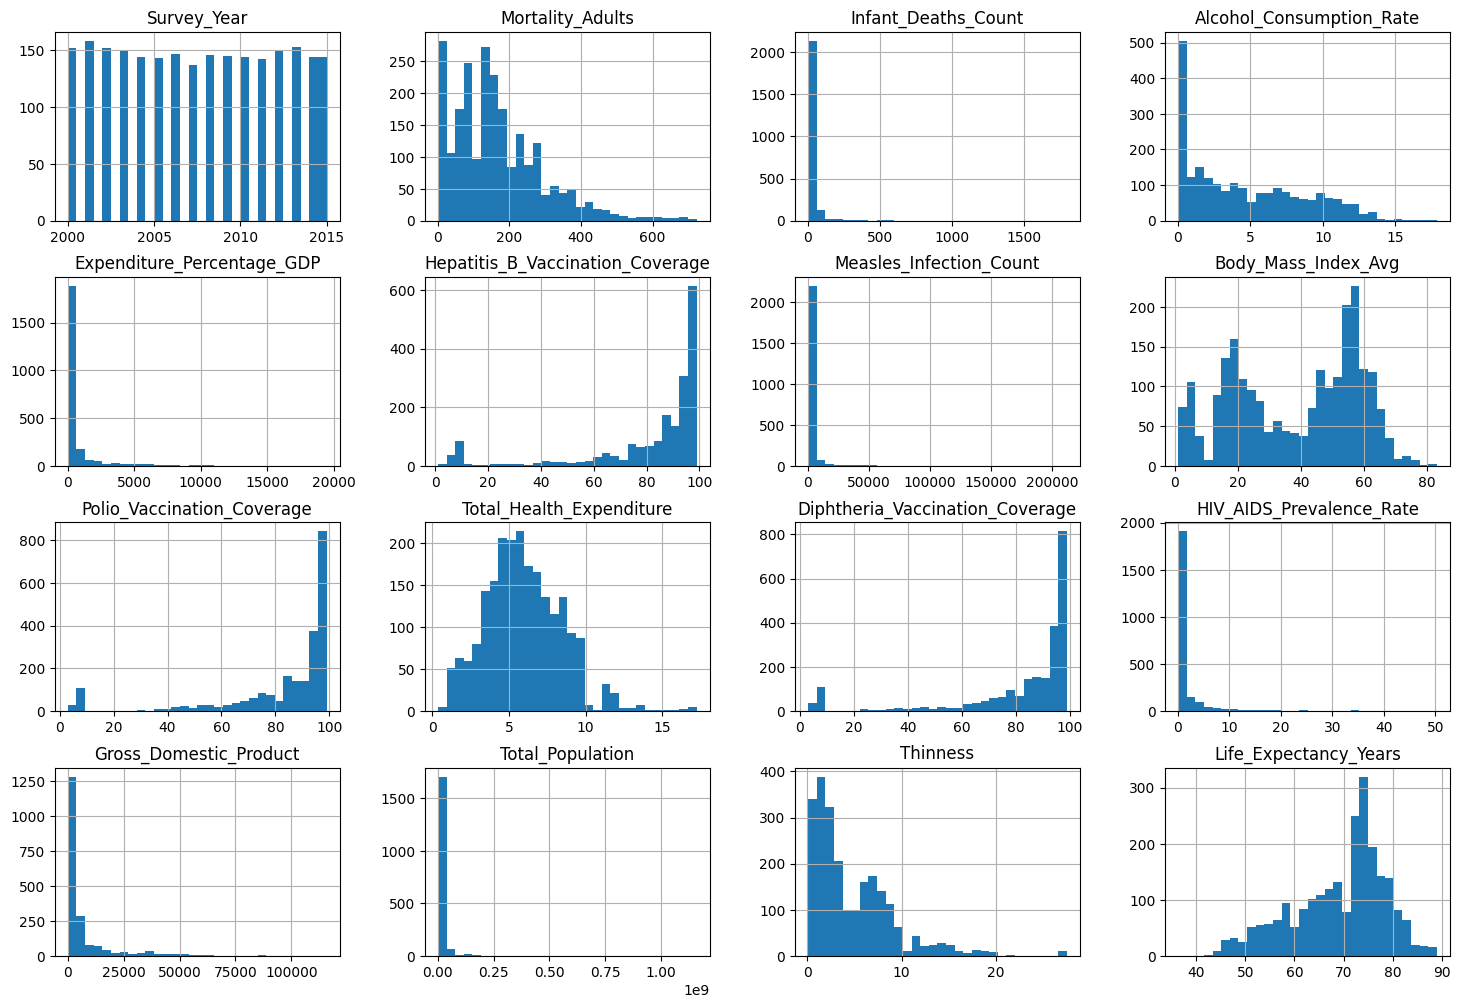

In [14]:
train_set.hist(bins=30, figsize=(18, 12))
plt.show()

### check for outliers 

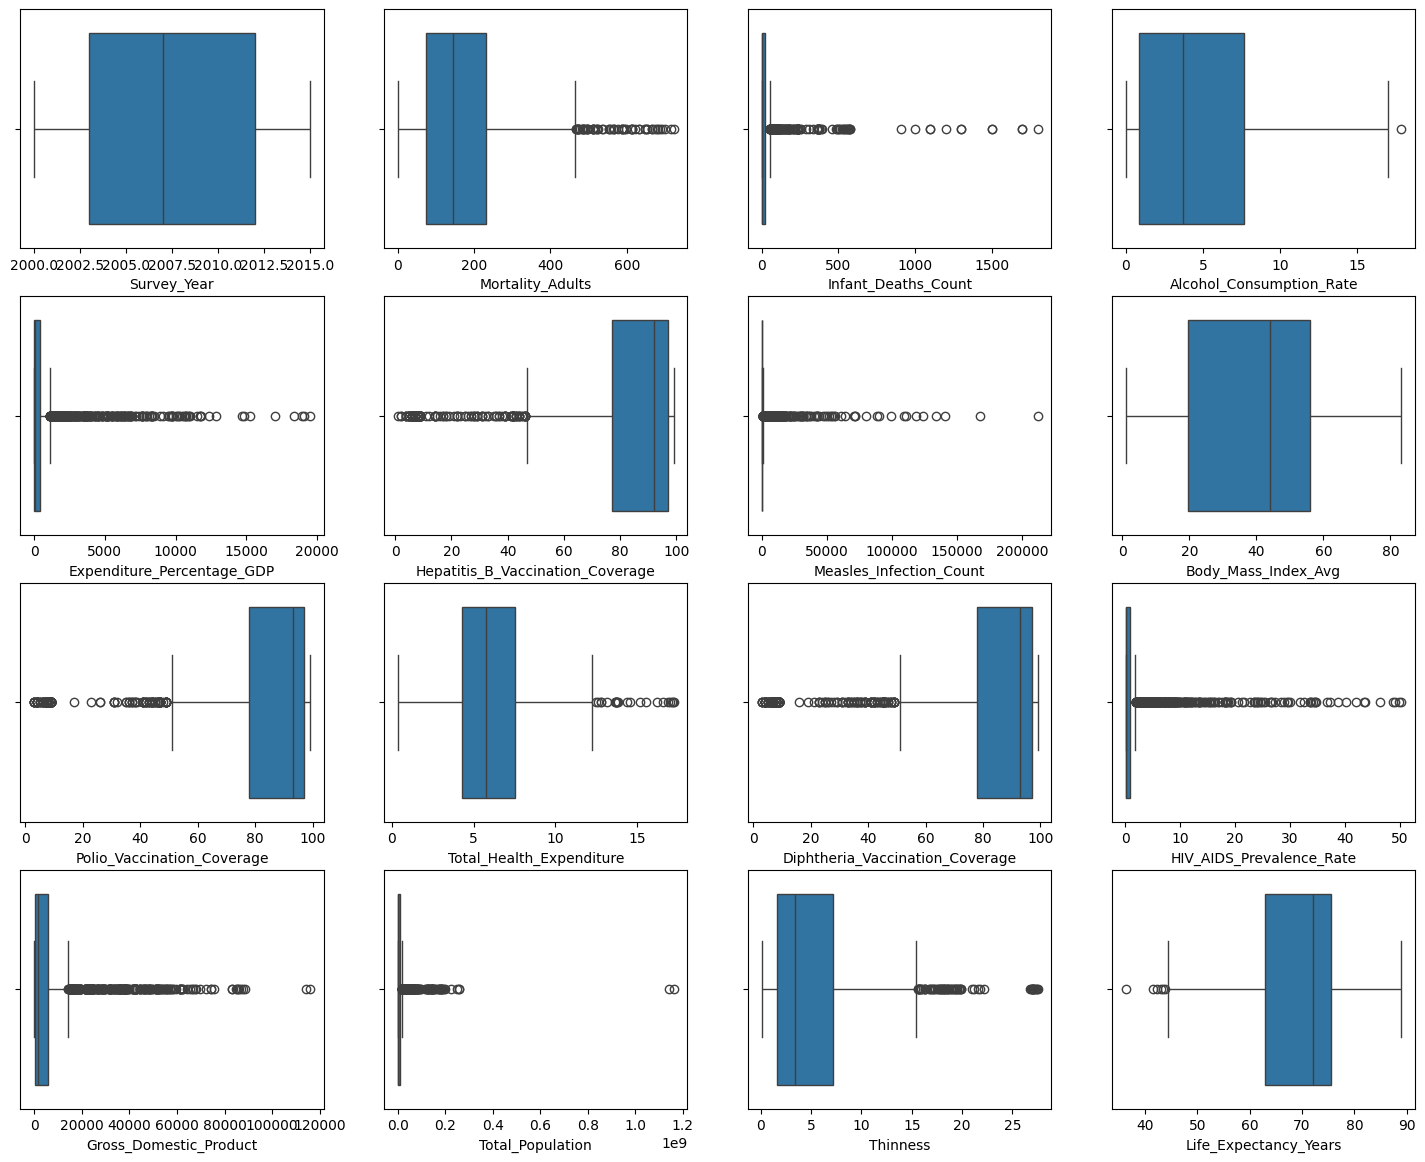

In [15]:
cols = train_set.select_dtypes("number").columns

fig = plt.figure(figsize=(18,18))
c = 1
for col in cols:
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=train_set)
    c = c + 1

<h1 style="color:darkred;">Observations from Exploring the Data</h1>
<ul>
    <li> <strong>Unnnamed column:</strong> It is useless, so I dropped it. </li>
    <li> <strong>Data Types:</strong> Defined the train_set into categorical and numerical types. </li>
    <li> <strong>Duplicates:</strong> There are no duplicate entries in the train_set. </li>
    <li> <strong>Missing Values:</strong> Most of the columns have small number of missing value but </li>
        <ul>
            <li>Gross Domestic Product: <span style="color:red;">15.25%</span> missing</li>
            <li>Total Population: <span style="color:red;">22.19%</span> missing</li>
            <li>Hepatitis B Vaccination Coverage: <span style="color:red;">18.82%</span> missing</li>
            <li>Total Health Expenditure: <span style="color:red;">7.73%</span> missing</li>
            <li>Alcohol Consumption Rate: <span style="color:red;">6.60%</span> missing</li>
        </ul>
    </li>
    <li> <strong>Skewness:</strong> Many columns exhibit skewness, which should be handled appropriately. </li>
    <li> <strong>Outliers:</strong> Detected many outliers through boxplots. These should be removed or handled. </li>
    <li> <strong>Scaling:</strong> The train_set has varying ranges, so it needs to be scaled. </li>
</ul>


### handling wrong answers 

In [16]:
per_col=['Mortality_Adults']
percent_col= ['Alcohol_Consumption_Rate', 'Expenditure_Percentage_GDP', 'Hepatitis_B_Vaccination_Coverage', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Thinness']

for col in per_col:
        train_set.loc[train_set[col] > 1000, col] = np.nan

for col in percent_col:
        train_set.loc[train_set[col] > 100, col] = np.nan

In [17]:
train_set.isna().sum()*100/len(train_set)

Nation                               0.042553
Survey_Year                          0.000000
Country_Category                     0.127660
Mortality_Adults                     0.382979
Infant_Deaths_Count                  0.000000
Alcohol_Consumption_Rate             6.382979
Expenditure_Percentage_GDP          44.680851
Hepatitis_B_Vaccination_Coverage    19.106383
Measles_Infection_Count              0.085106
Body_Mass_Index_Avg                  1.106383
Polio_Vaccination_Coverage           0.595745
Total_Health_Expenditure             7.574468
Diphtheria_Vaccination_Coverage      0.595745
HIV_AIDS_Prevalence_Rate             0.000000
Gross_Domestic_Product              15.063830
Total_Population                    22.170213
Thinness                             1.106383
Life_Expectancy_Years                0.297872
dtype: float64

<h3 style="color:darkblue;">Expenditure_Percentage_GDP</h3>
<p>
Upon examining the <strong>describe</strong> statistics of this column, it is evident that:
</p>
<ul>
    <li>The <strong>standard deviation</strong> is extremely large, indicating high variability.</li>
    <li>This column represents percentages, <strong>yet almost half of the train_set exceeds 100</strong>, which is invalid.</li>
</ul>
<p>Based on these observations, I have decided to drop this column.</p>


In [18]:
train_set.drop(columns = 'Expenditure_Percentage_GDP',inplace = True)
copy_1.drop(columns = 'Expenditure_Percentage_GDP',inplace = True)

<h3 style="color:darkblue;">Methods for Handling Missing Values</h3>
<ul>
    <li><strong>Pandas:</strong> <code>fillna with median</code></li>
</ul>

</p>


In [19]:
imputede_col = ['Mortality_Adults', 'Measles_Infection_Count', 'Alcohol_Consumption_Rate', 'Total_Health_Expenditure',
                'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage', 'Thinness', 'Life_Expectancy_Years', 'Diphtheria_Vaccination_Coverage'
                ,'Hepatitis_B_Vaccination_Coverage', 'Gross_Domestic_Product', 'Total_Population']

train_set[imputede_col] = train_set[imputede_col].fillna(train_set[imputede_col].median())

train_set['Mortality_Adults'] = train_set['Mortality_Adults'].round().astype(int)

In [20]:
train_set.shape

(2350, 17)

In [21]:
train_set.isna().sum()

Nation                              1
Survey_Year                         0
Country_Category                    3
Mortality_Adults                    0
Infant_Deaths_Count                 0
Alcohol_Consumption_Rate            0
Hepatitis_B_Vaccination_Coverage    0
Measles_Infection_Count             0
Body_Mass_Index_Avg                 0
Polio_Vaccination_Coverage          0
Total_Health_Expenditure            0
Diphtheria_Vaccination_Coverage     0
HIV_AIDS_Prevalence_Rate            0
Gross_Domestic_Product              0
Total_Population                    0
Thinness                            0
Life_Expectancy_Years               0
dtype: int64

#### the remaining columns i will see it individually 

<h1 style="color:darkred; font-weight:bold;">Nation</h1>


In [22]:
train_set["Nation"].value_counts().sort_values(ascending=False)

Nation
Qatar                    16
Italy                    16
Comoros                  16
Russian Federation       16
Nigeria                  16
                         ..
Marshall Islands          1
Dominica                  1
Palau                     1
Saint Kitts and Nevis     1
Tuvalu                    1
Name: count, Length: 190, dtype: int64

In [23]:
train_set["Nation"].isnull().sum()

1

In [24]:
# as it is only a one instance and it's categorical we can just drop it 
train_set = train_set.dropna(subset=["Nation"])
train_set["Nation"].isna().sum()

0

<h1 style="color:darkred; font-weight:bold;">Country_Category</h1>

In [25]:
train_set[train_set["Country_Category"].isna()]

,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
101,Chad,2015.0,NaN,356,46,3.715,46.0,418.0,19.1,52.0,5.77,46.0,2.8,777.248751,149413.0,8.5,53.1
54,Lebanon,2008.0,NaN,98,1,1.670,81.0,24.0,62.5,75.0,8.70,81.0,0.1,712.775759,411147.0,4.7,74.5
9,Swaziland,2011.0,NaN,438,2,5.200,91.0,0.0,3.2,85.0,8.61,91.0,15.7,3934.273250,1225258.0,5.1,55.0


I searched and found that 
- Swaziland: Now known as Eswatini, it is considered a developing country.
- Lebanon: Lebanon is generally classified as a developing country.
- Chad: Chad is classified as a developing country.
   - so i can hardcode it 

In [26]:
train_set.loc[(train_set['Nation'] == 'Swaziland') & (train_set['Country_Category'].isna()), 'Country_Category'] = 'Developing'
train_set.loc[(train_set['Nation'] == 'Lebanon') & (train_set['Country_Category'].isna()), 'Country_Category'] = 'Developing'
train_set.loc[(train_set['Nation'] == 'Chad') & (train_set['Country_Category'].isna()), 'Country_Category'] = 'Developing'

<Axes: ylabel='count'>

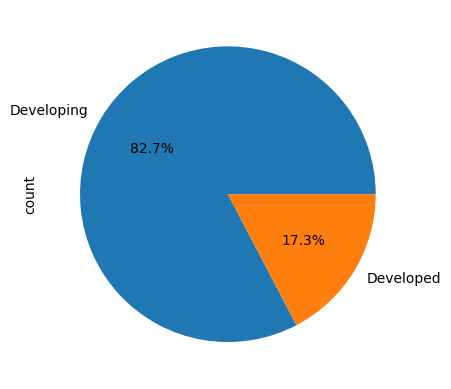

In [27]:
train_set['Country_Category'].value_counts().plot.pie(autopct='%1.1f%%')

In [28]:
train_set.isna().sum()

Nation                              0
Survey_Year                         0
Country_Category                    0
Mortality_Adults                    0
Infant_Deaths_Count                 0
Alcohol_Consumption_Rate            0
Hepatitis_B_Vaccination_Coverage    0
Measles_Infection_Count             0
Body_Mass_Index_Avg                 0
Polio_Vaccination_Coverage          0
Total_Health_Expenditure            0
Diphtheria_Vaccination_Coverage     0
HIV_AIDS_Prevalence_Rate            0
Gross_Domestic_Product              0
Total_Population                    0
Thinness                            0
Life_Expectancy_Years               0
dtype: int64

#### now all the there is no missing values 

<h1 style="color:darkred; font-size:28px;">Handling Outliers</h1>
<h4 style="font-size:20px;">
    I will mainly use the <strong>Random Forest and other ensemble</strong> models, which is less sensitive to outliers. However, for the task of cleaning and validating the train_set, I will apply additional steps.
</h4>
<ul style="font-size:18px;">
    <li><strong>Clip:</strong> I will clip the upper and lower bounds using the <strong>IQR (Interquartile Range)</strong> method.</li>
</ul>


In [29]:
outlier_cols = ['Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate','Hepatitis_B_Vaccination_Coverage', 'Measles_Infection_Count', 'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Gross_Domestic_Product', 'Total_Population', 'Thinness']

for col_name in outlier_cols:
    # Calculate quartiles and IQR
    q1 = train_set[col_name].quantile(0.25)
    q3 = train_set[col_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_set[col_name] = train_set[col_name].clip(lower_bound, upper_bound)


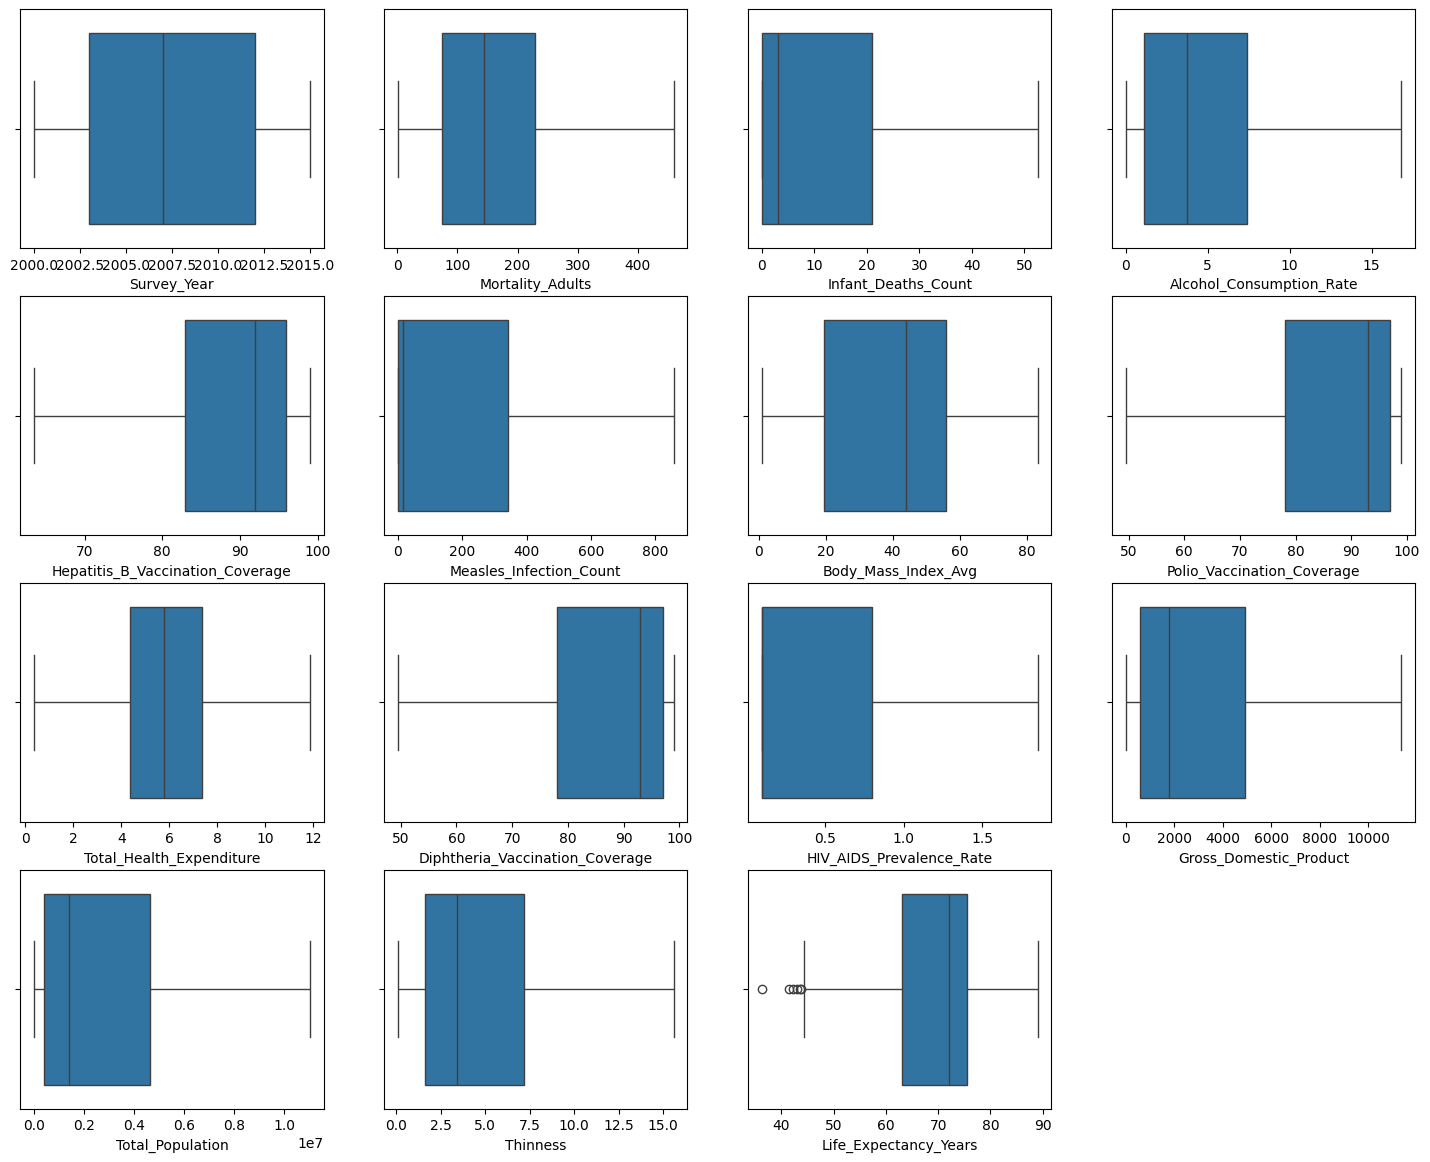

In [30]:
cols = train_set.select_dtypes("number").columns

fig = plt.figure(figsize=(18,18))
c = 1
for col in cols:
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=train_set)
    c = c + 1

#### from the boxplots there is no more outliers

<h1 style="color:darkred; font-size:28px;">Handling Skewness</h1>



### skewness in the original train_set

In [31]:
num_col = ['Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate','Hepatitis_B_Vaccination_Coverage', 'Measles_Infection_Count', 'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Gross_Domestic_Product', 'Total_Population', 'Thinness', 'Life_Expectancy_Years']
original_skewness = train_set[num_col].skew()
original_skewness
train_set


,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
456,Iceland,2008.0,Developed,58,0.0,8.49,92.0,0.0,58.1,98.0,8.80,98.0,0.10,11366.219317,317414.0,0.9,81.4
462,Myanmar,2002.0,Developing,235,52.5,0.41,92.0,736.0,14.6,84.0,2.50,79.0,0.40,143.776510,471422.0,13.3,62.8
2172,Angola,2008.0,Developing,371,52.5,7.07,69.0,265.0,19.3,65.0,3.84,69.0,1.85,3868.578883,2175942.0,9.5,48.7
2667,Costa Rica,2013.0,Developing,96,1.0,3.42,94.0,0.0,58.5,95.0,9.47,95.0,0.10,1569.666310,47641.0,1.7,79.4
381,Italy,2014.0,Developed,57,2.0,7.56,95.0,0.0,63.1,95.0,9.25,95.0,0.10,11366.219317,678914.0,0.6,82.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Czechia,2012.0,Developed,93,0.0,12.71,99.0,22.0,64.5,99.0,7.55,99.0,0.10,1772.961675,1396861.0,1.8,78.0
1095,Chad,2014.0,Developing,362,46.0,0.01,63.5,857.5,18.7,49.5,3.62,49.5,1.85,125.998515,11018742.0,8.7,52.6
1130,Latvia,2009.0,Developed,184,0.0,9.85,92.0,0.0,58.5,94.0,6.84,94.0,0.10,11366.219317,2141669.0,2.3,72.6
1294,Finland,2012.0,Developing,82,0.0,9.24,92.0,0.0,61.0,99.0,9.30,99.0,0.10,11366.219317,5413971.0,0.9,84.0


In [32]:
positive_skewed = original_skewness[original_skewness>.5].index
negative_skewed = original_skewness[original_skewness< -.5].index
negative_skewed = negative_skewed.drop("Life_Expectancy_Years")

negative_skewed

Index(['Hepatitis_B_Vaccination_Coverage', 'Polio_Vaccination_Coverage',
       'Diphtheria_Vaccination_Coverage'],
      dtype='object')

<h2 style="color:darkblue; font-size:24px;">Positive Skewness</h2>
<p style="font-size:18px;">
    The following transformers will be exprimented for handling the train_set:
</p>
<ul style="font-size:18px;">
    <li><strong>Log:</strong> log_transformer</li>
    <li><strong>Square Root:</strong> sqrt_transformer</li>
    <li><strong>Yeo-Johnson:</strong> yeo_transformer</li>
    <li><strong>Quantile:</strong> quantile</li>
</ul>


In [33]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from scipy.stats import skew
import copy

def calculate_skewness(df):
    return df.apply(skew)


log_transformer = FunctionTransformer(np.log1p, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
quantile = QuantileTransformer(output_distribution='normal')

transformers = {
    'Log': log_transformer,
    'Square Root': sqrt_transformer,
    'Yeo-Johnson': yeo_transformer,
    'Quantile': quantile
}

results_df = pd.DataFrame(index=transformers.keys(), columns=positive_skewed)
train_set_copy = train_set.copy()
results_df.loc['Original'] = calculate_skewness(train_set_copy[positive_skewed])


for name, transformer in transformers.items():
    transformed_train_set = transformer.fit_transform(train_set_copy[positive_skewed])
    transformed_df = pd.DataFrame(transformed_train_set, columns=positive_skewed)
    skewness1 = calculate_skewness(transformed_df)
    

    results_df.loc[name] = skewness1

results_df


,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Measles_Infection_Count,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness
Log,-1.221521,0.323474,-0.327322,0.179176,1.094774,-0.704610,-1.303018,0.029753
Square Root,-0.073241,0.686234,-0.150476,0.838711,1.044908,0.608273,0.651534,0.382103
Yeo-Johnson,-0.116153,0.128084,-0.086623,0.088557,0.775877,-0.070137,-0.121003,0.005102
Quantile,1.294335,0.000955,-1.660091,0.152245,0.791542,1.423249,1.401660,0.881403
Original,0.773016,1.264455,0.629462,1.185867,1.204355,1.167220,1.200303,1.096385


<h3 style="color:darkblue; font-size:22px;">Conclusion: Best Transformer</h3>
<p style="font-size:18px;">
    Based on the results from applying all transformers, the <strong>Yeo-Johnson transformer</strong> is the best
</p>

In [34]:
train_set_copy[positive_skewed] = yeo_transformer.fit_transform(train_set_copy[positive_skewed])

<h2 style="color:darkblue; font-size:24px;">Negative Skewness</h2>
<p style="font-size:18px;">
    The following transformers will be applied to the train_set:
</p>
<ul style="font-size:18px;">
    <li><strong>Exponential:</strong> exp_transformer</li>
    <li><strong>Square:</strong> square_transformer</li>
    <li><strong>Cube:</strong> cube_transformer</li>
    <li><strong>Reciprocal:</strong> reciprocal_transformer</li>
    <li><strong>Log:</strong> log_transformer</li>
    <li><strong>Quantile:</strong> quantile</li>
</ul>


In [35]:
exp_transformer = FunctionTransformer(np.exp, validate=True)        # exp(x)
square_transformer = FunctionTransformer(np.square, validate=True)  # x^2
cube_transformer = FunctionTransformer(lambda x: np.power(x, 3), validate=True)  # x^3
reciprocal_transformer = FunctionTransformer(lambda x: 1 / (x + 1e-6), validate=True)  # 1/x to avoid division by zero
log_transformer = FunctionTransformer(np.log1p, validate=True)
quantile = QuantileTransformer(output_distribution='normal')


transformers = {
    'Exponential': exp_transformer,
    'Square': square_transformer,
    'Cube': cube_transformer,
    'Reciprocal': reciprocal_transformer,
    'Log': log_transformer,
    'quantile' : quantile
}
results_df1 = pd.DataFrame(index=transformers.keys(), columns=train_set_copy[negative_skewed].columns)


results_df1.loc['Original'] = calculate_skewness(train_set_copy[negative_skewed])

for name, transformer in transformers.items():
    transformed_train_set = transformer.fit_transform(train_set_copy[negative_skewed])
    transformed_df = pd.DataFrame(transformed_train_set, columns=negative_skewed)
    skewness = calculate_skewness(transformed_df)
    
    results_df1.loc[name] = skewness

results_df1

,Hepatitis_B_Vaccination_Coverage,Polio_Vaccination_Coverage,Diphtheria_Vaccination_Coverage
Exponential,2.551724,1.890686,1.960884
Square,-0.995997,-1.039938,-1.056863
Cube,-0.861488,-0.846765,-0.858272
Reciprocal,1.366001,1.710508,1.724131
Log,-1.248873,-1.480947,-1.500760
quantile,-0.199443,0.143486,0.070557
Original,-1.126357,-1.255547,-1.275907


<h3 style="color:darkblue; font-size:22px;">Conclusion: Best Transformer</h3>
<p style="font-size:18px;">
    After applying all the transformers, <strong>Saquare</strong> is the most effective in handling the train_set. 
</p>

In [36]:
train_set_copy[negative_skewed] = square_transformer.fit_transform(train_set_copy[negative_skewed])

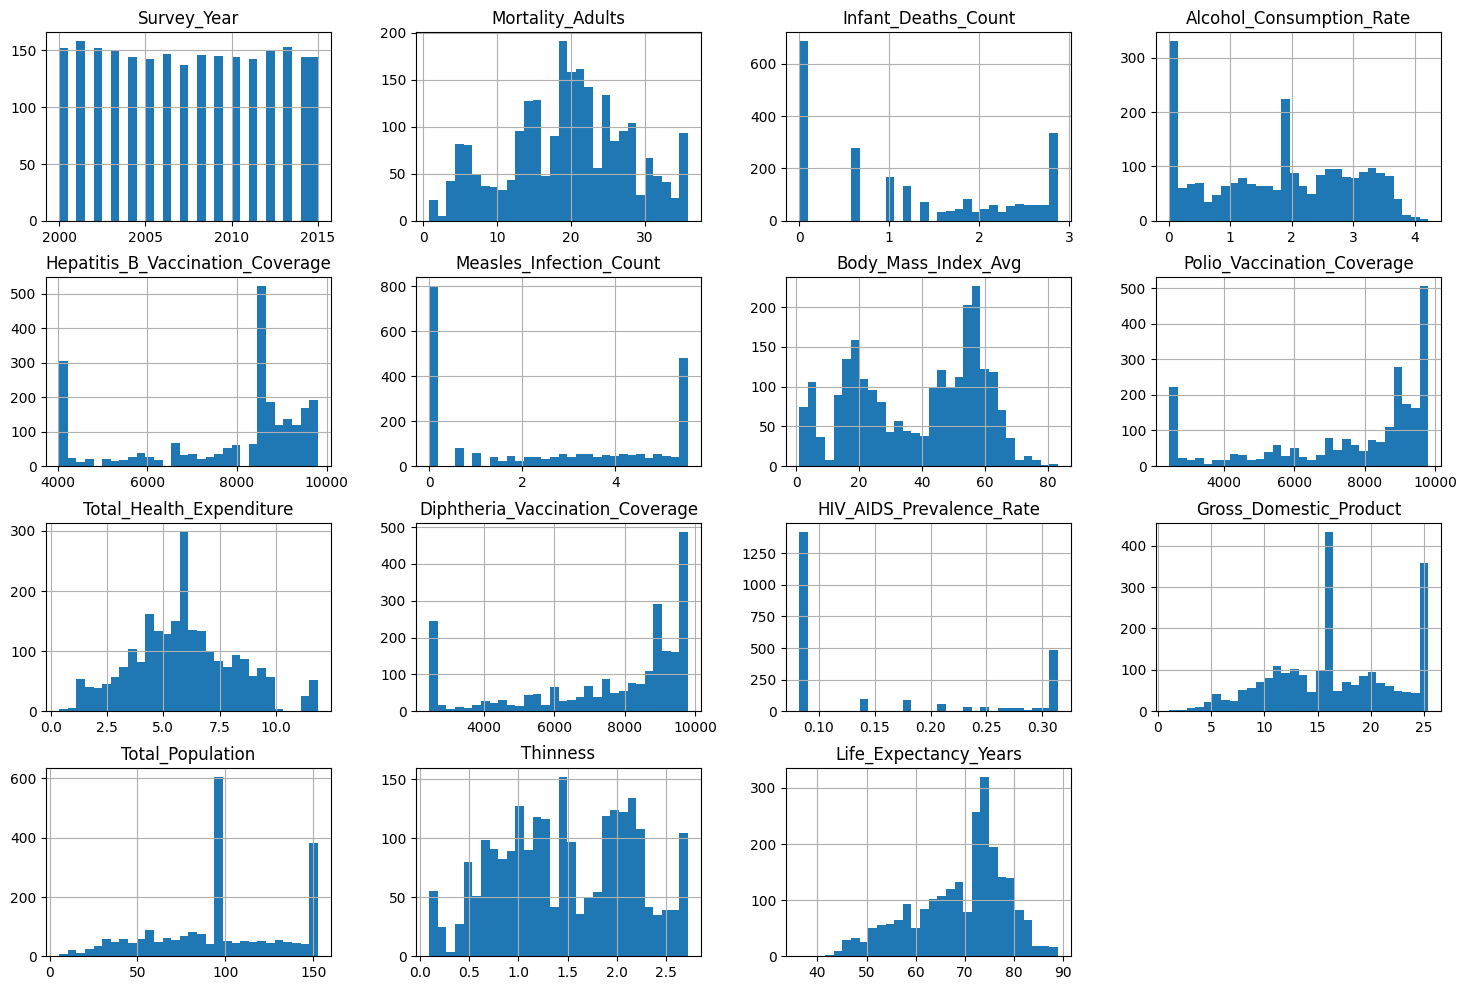

In [37]:
train_set_copy.hist(bins=30, figsize=(18, 12))
plt.show()

# train_set cleaning has finished

<h1 style="color:darkred; font-size:28px;">Let's dive into train_set anlaysis and visulaizations</h1>

### Data over the years 

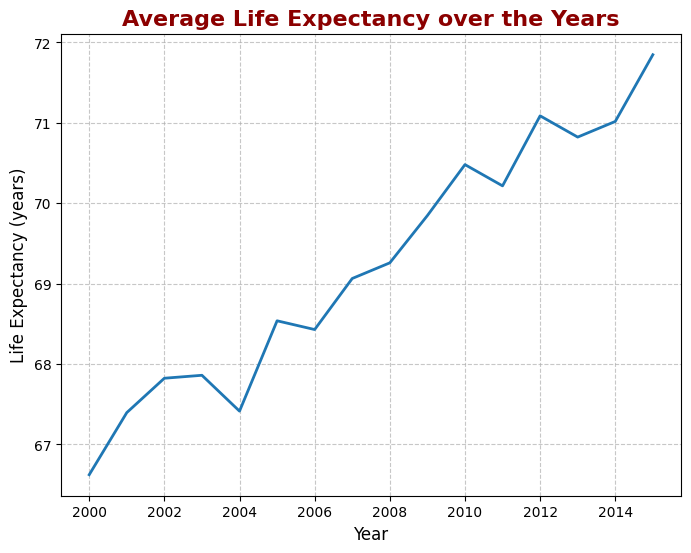

In [38]:
average_life_expectancy = train_set.groupby('Survey_Year')['Life_Expectancy_Years'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(average_life_expectancy['Survey_Year'], average_life_expectancy['Life_Expectancy_Years'], color='tab:blue', lw=2)

plt.title('Average Life Expectancy over the Years', fontsize=16, fontweight='bold',color="darkred")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.style.use('dark_background')

plt.show()



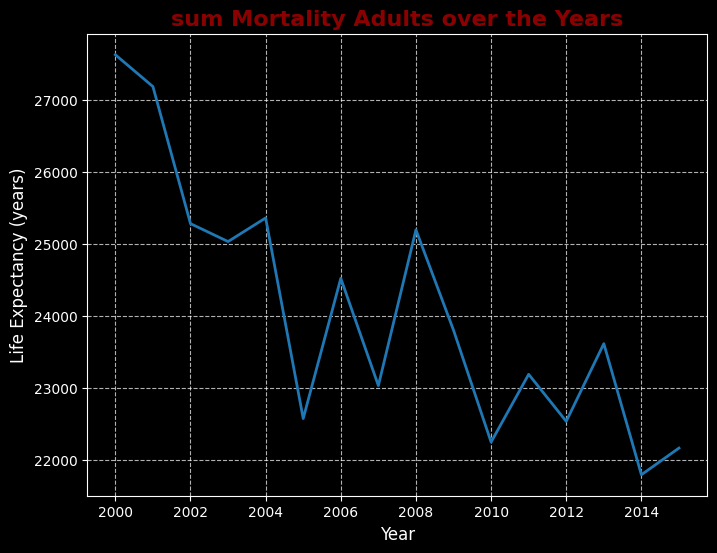

In [39]:
sum_Mortality_Adults = train_set.groupby('Survey_Year')['Mortality_Adults'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(sum_Mortality_Adults['Survey_Year'], sum_Mortality_Adults['Mortality_Adults'], color='tab:blue', lw=2)

plt.title('sum Mortality Adults over the Years', fontsize=16, fontweight='bold',color="darkred")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.style.use('dark_background')

plt.show()

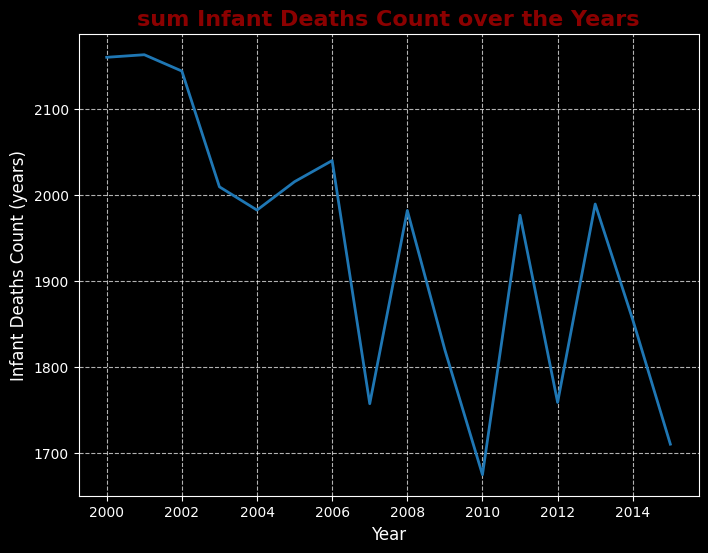

In [40]:
sum_Infant_Deaths_Count = train_set.groupby('Survey_Year')['Infant_Deaths_Count'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(sum_Infant_Deaths_Count['Survey_Year'], sum_Infant_Deaths_Count['Infant_Deaths_Count'], color='tab:blue', lw=2)

plt.title('sum Infant Deaths Count over the Years', fontsize=16, fontweight='bold',color="darkred")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Infant Deaths Count (years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.style.use('dark_background')

plt.show()

<h1 style="color:darkred; font-size:28px;">overall look</h1>

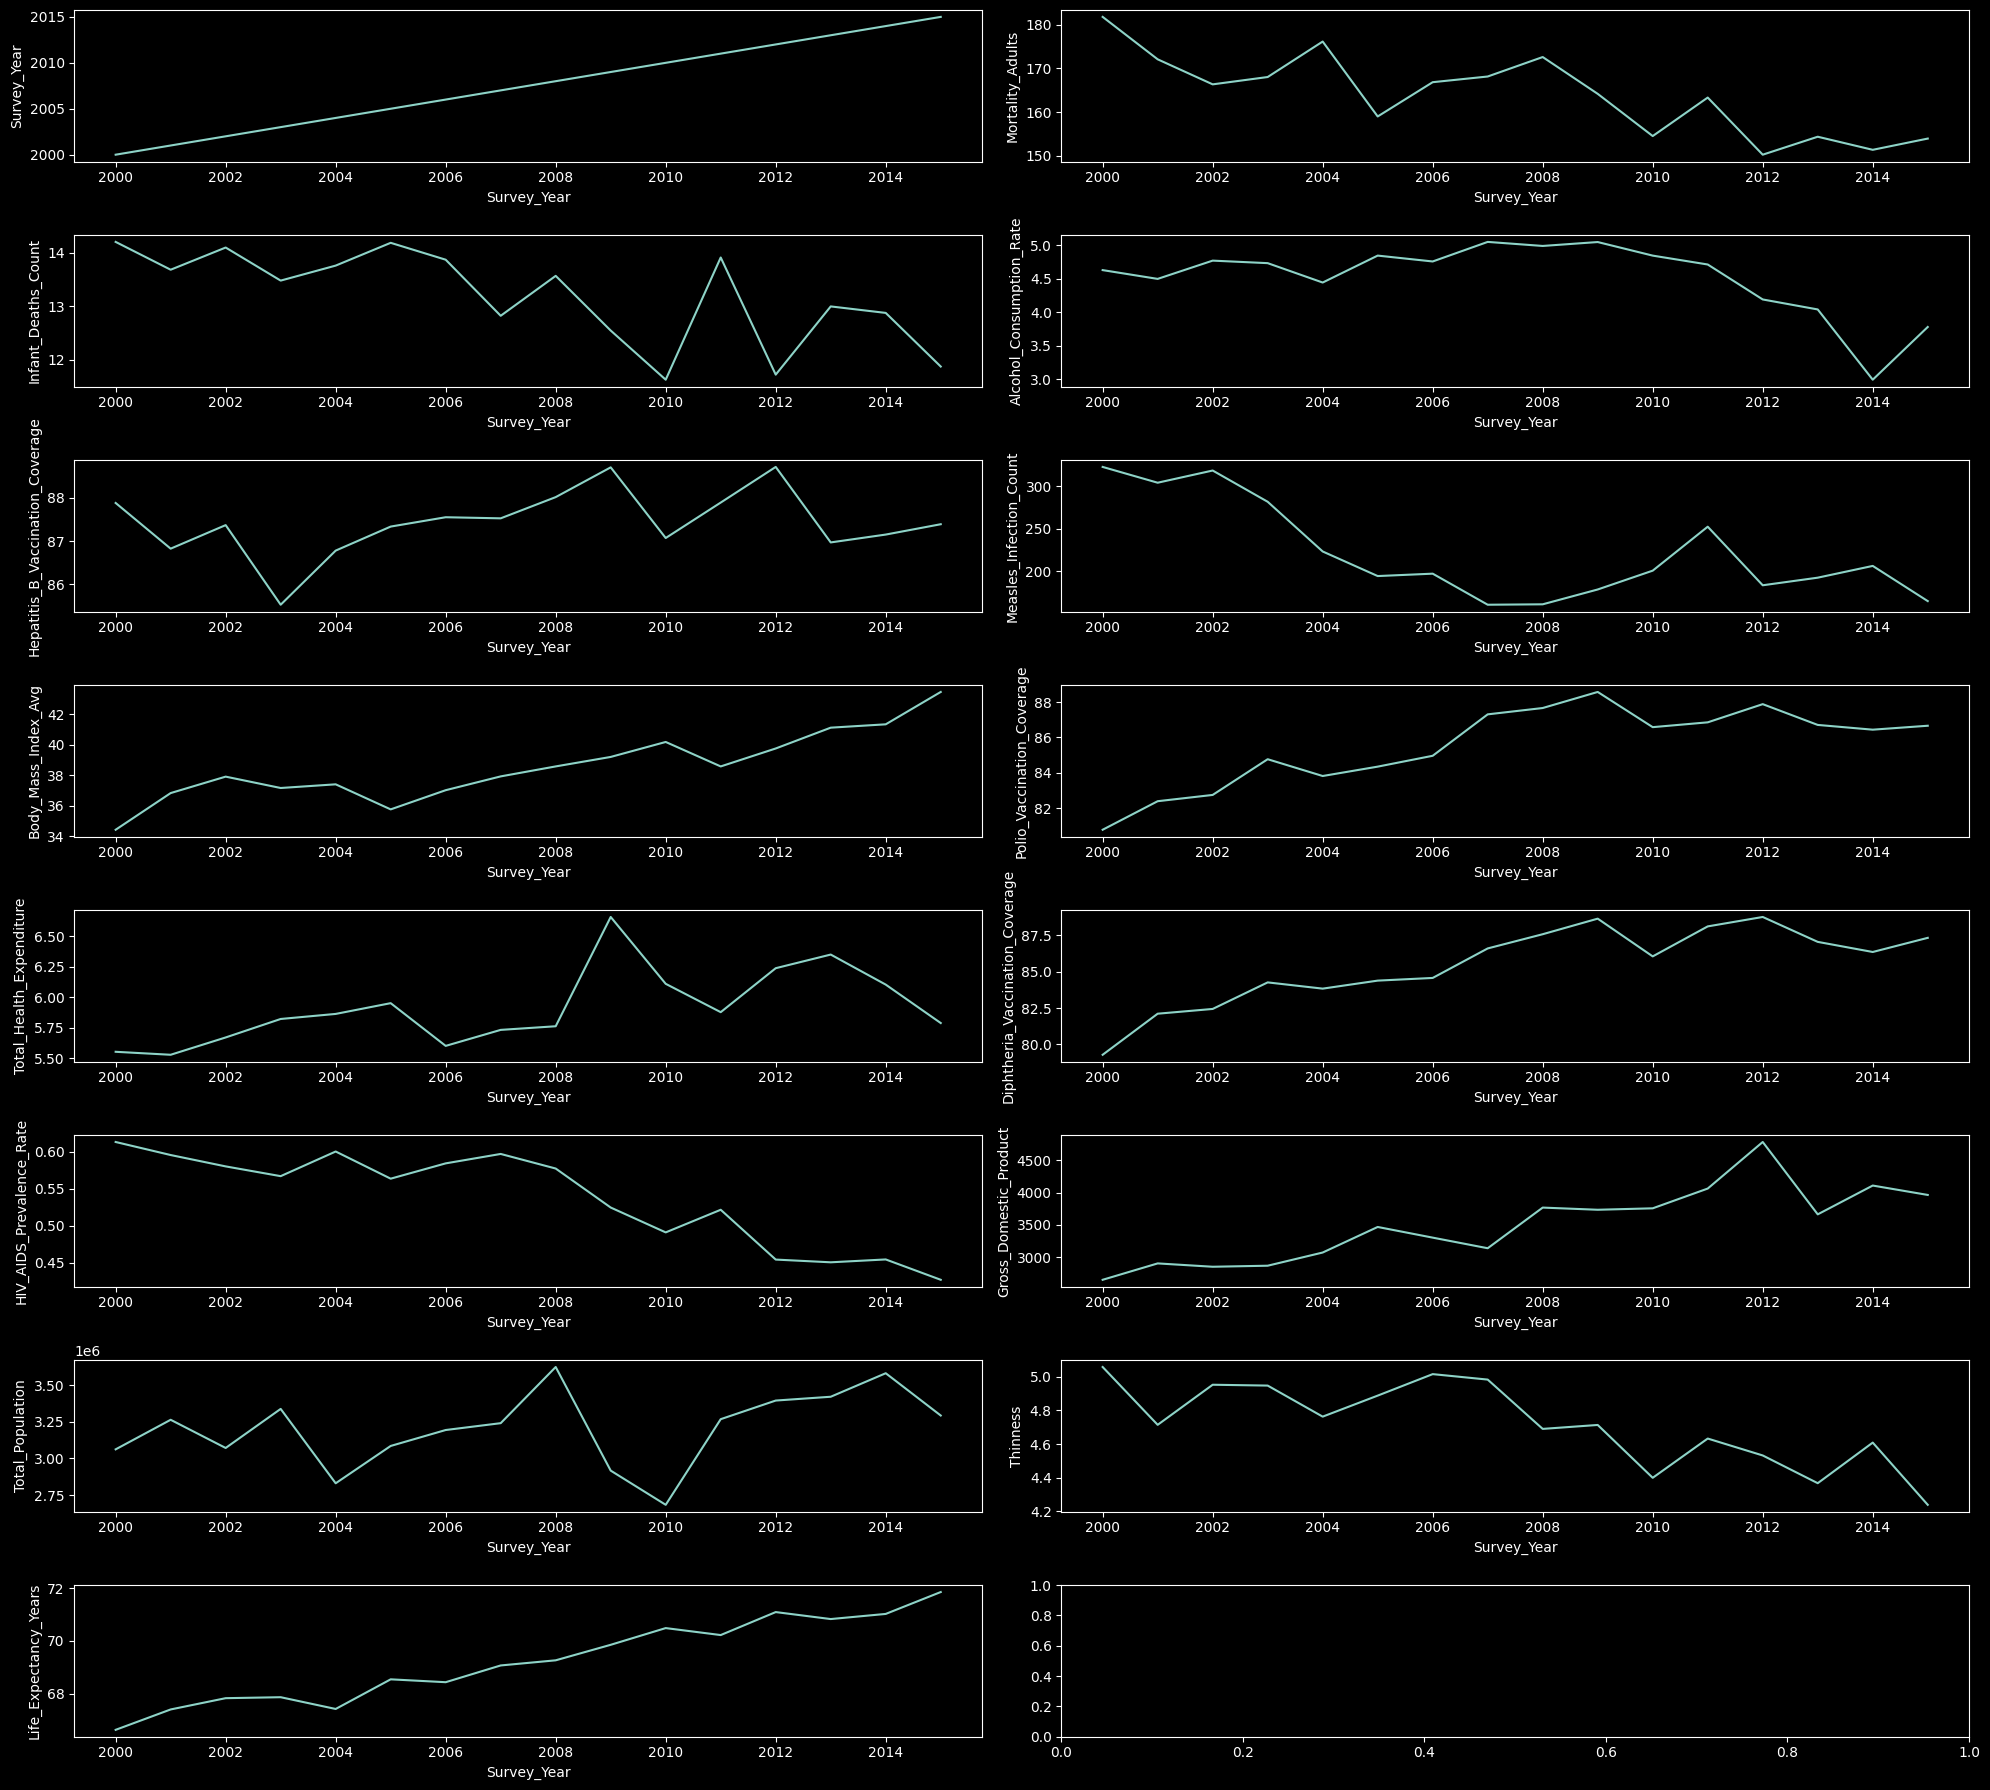

In [41]:
fig, axes = plt.subplots(nrows=(len(train_set.select_dtypes(include='number').columns) - 1) // 2 + 1, ncols=2, figsize=(20, 18))

for idx, col in enumerate(train_set.select_dtypes(include='number').columns):
        row_idx = idx // 2
        col_idx = idx % 2
        sns.lineplot(x='Survey_Year', y=col, data=train_set, ax=axes[row_idx, col_idx], markers=True, ci=None)


plt.tight_layout()
plt.show()

<h2 style="color:darkred; font-size:24px;">Insights and Conclusions</h2>
<ul style="font-size:18px;">
    <li><strong>Life Expectancy:</strong> Shows a steady increase over the years.</li>
    <li><strong>Adult Mortality Rates:</strong> Are inconsistent but exhibit an overall decreasing trend.</li>
    <li><strong>Infant Deaths:</strong> Display a clear and significant decline over the years.</li>
</ul>


<h1 style="color:darkred; font-size:28px;">Developed vs Developing</h1>

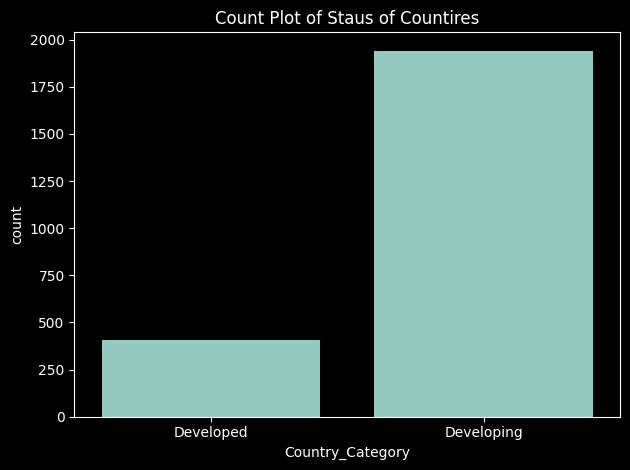

In [42]:
sns.countplot(x=train_set['Country_Category'])
plt.title('Count Plot of Staus of Countires')
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

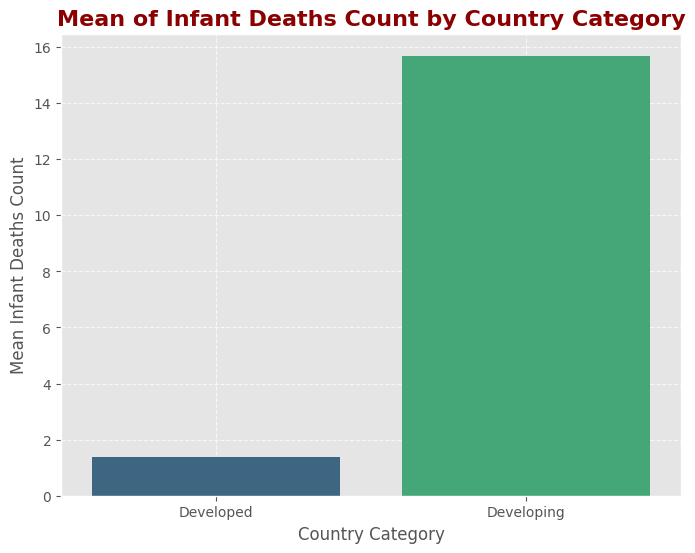

In [43]:
mean_Infant_Deaths_Count = train_set.groupby('Country_Category')['Infant_Deaths_Count'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Country_Category', y='Infant_Deaths_Count', data=mean_Infant_Deaths_Count, palette='viridis')

plt.title('Mean of Infant Deaths Count by Country Category', fontsize=16, fontweight='bold', color="darkred")
plt.xlabel('Country Category', fontsize=12)
plt.ylabel('Mean Infant Deaths Count', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot') 

plt.show()

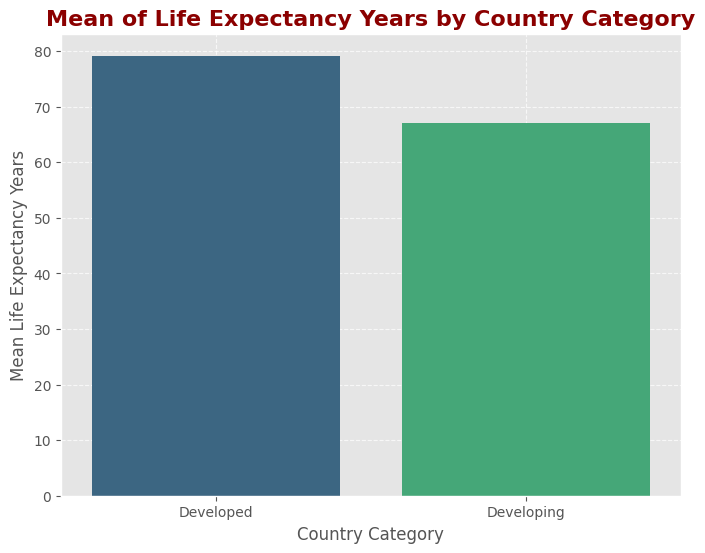

In [44]:
mean_Life_Expectancy_Years = train_set.groupby('Country_Category')['Life_Expectancy_Years'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Country_Category', y='Life_Expectancy_Years', data=mean_Life_Expectancy_Years, palette='viridis')


plt.title('Mean of Life Expectancy Years by Country Category', fontsize=16, fontweight='bold', color="darkred")
plt.xlabel('Country Category', fontsize=12)
plt.ylabel('Mean Life Expectancy Years', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot') 

plt.show()

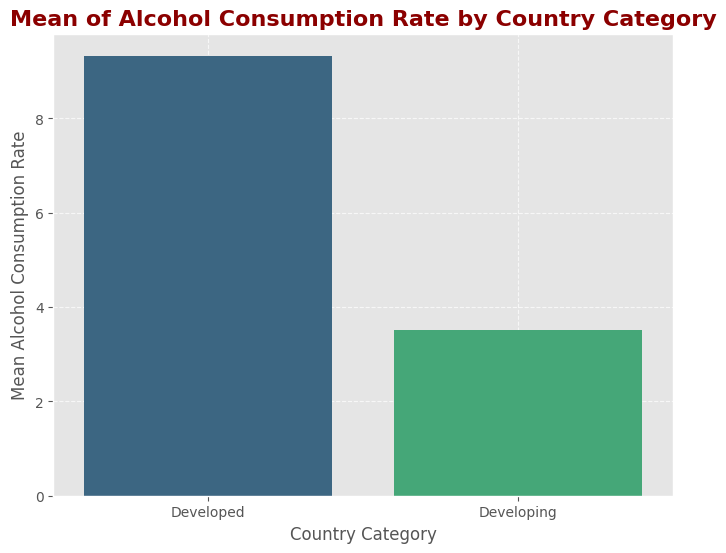

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_Alcohol_Consumption_Rate = train_set.groupby('Country_Category')['Alcohol_Consumption_Rate'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Country_Category', y='Alcohol_Consumption_Rate', data=mean_Alcohol_Consumption_Rate, palette='viridis')


plt.title('Mean of Alcohol Consumption Rate by Country Category', fontsize=16, fontweight='bold', color="darkred")
plt.xlabel('Country Category', fontsize=12)
plt.ylabel('Mean Alcohol Consumption Rate', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')  

plt.show()


<h2 style="color:darkred; font-size:24px;">Insights and Conclusions</h2>
<ul style="font-size:18px;">
    <li><strong>Developing countries</strong>is much higher in appearance than developed</li>
    <li><strong>mean infant deaths and mortality Adult</strong>is much higher in  developing countries</li>
    <li><strong>mean life expectancy</strong> is quite higher in developed countries</li>
    <li><strong>Alcohol Consumption</strong> ishigher in developed countries</li>
</ul>

<h2 style="color:darkred; font-size:24px;">Top countries</h2>

## Top Life Expectancy Countries

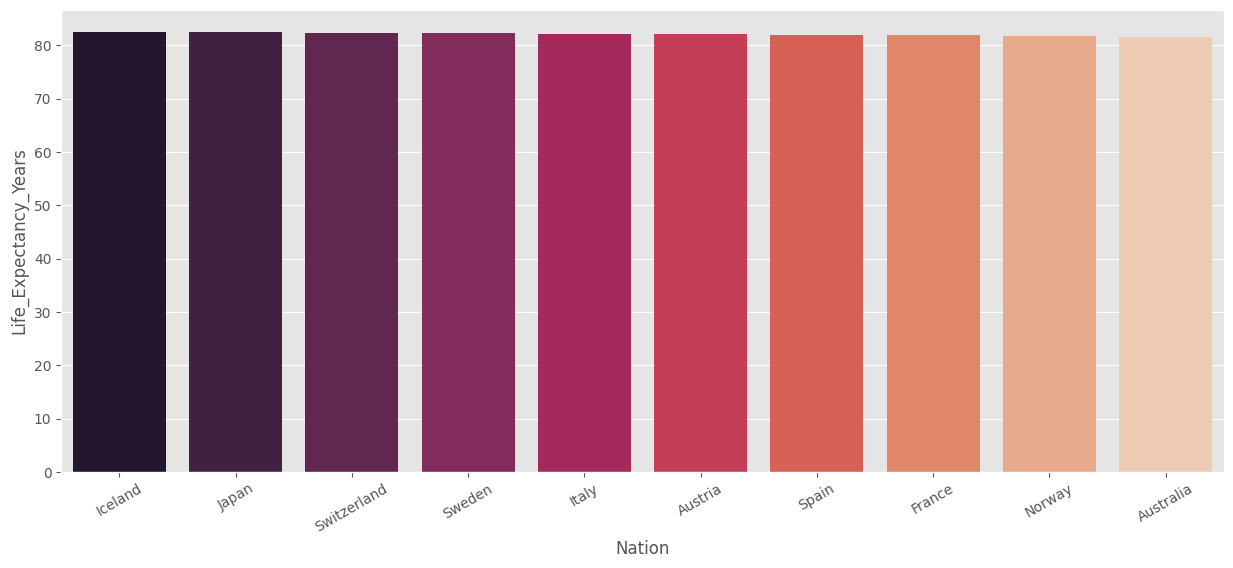

In [46]:
country_life_expectancy = train_set.groupby('Nation')['Life_Expectancy_Years'].mean().reset_index()

top_countries = country_life_expectancy.sort_values('Life_Expectancy_Years', ascending=False).head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Nation', y = 'Life_Expectancy_Years', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)


plt.show()


## lowest Life Expectancy Countries

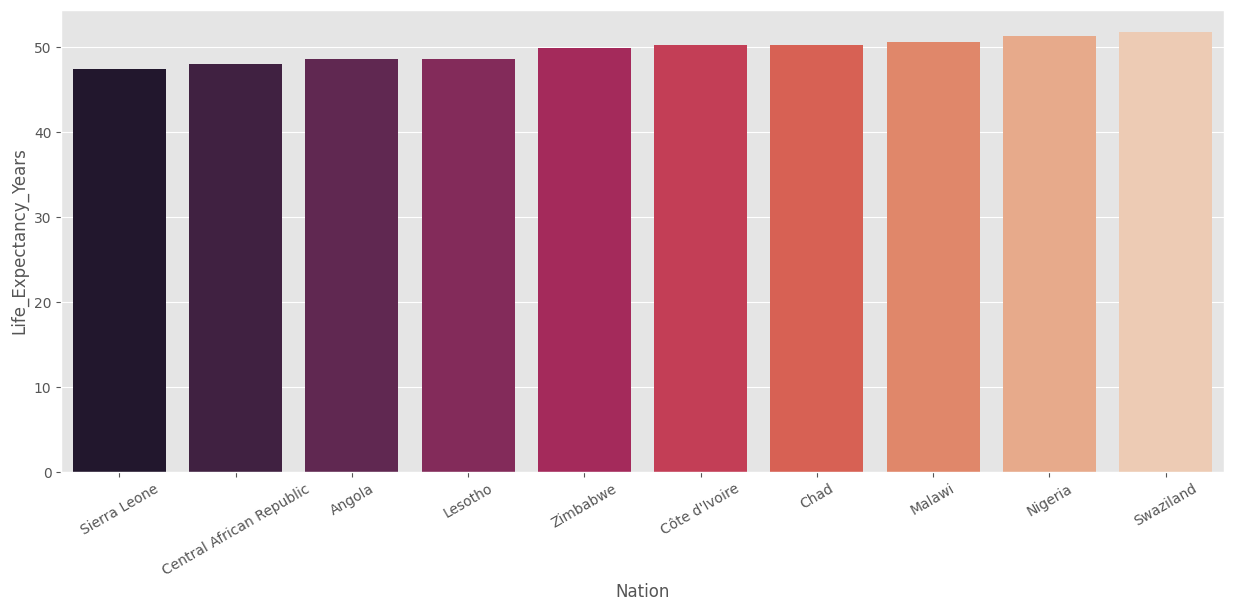

In [47]:
top_countries = country_life_expectancy.sort_values('Life_Expectancy_Years').head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Nation', y = 'Life_Expectancy_Years', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

# Show the plot
plt.show()

## Top infant diseases count 

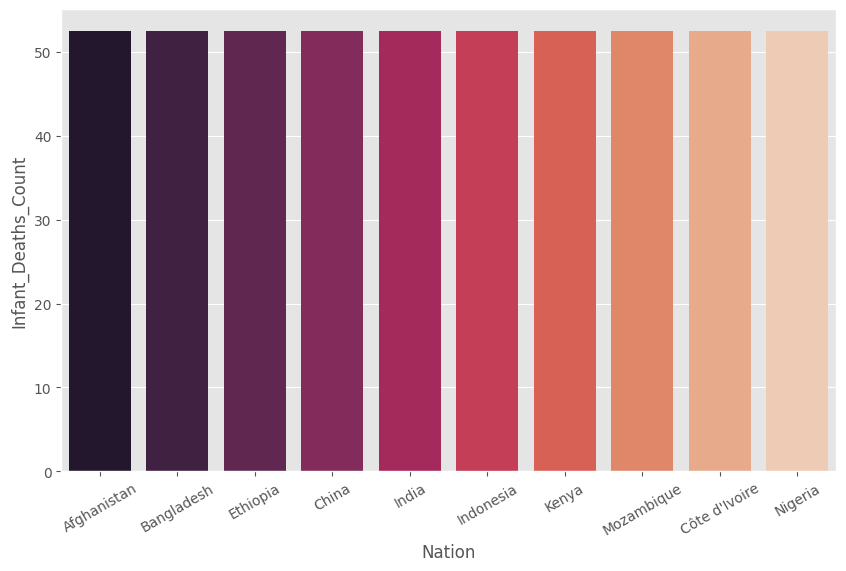

In [48]:
country_Infant_Deaths = train_set.groupby('Nation')['Infant_Deaths_Count'].mean().reset_index()

top_countries = country_Infant_Deaths.sort_values('Infant_Deaths_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Nation', y = 'Infant_Deaths_Count', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

plt.show()

## Top Mortality_Adults

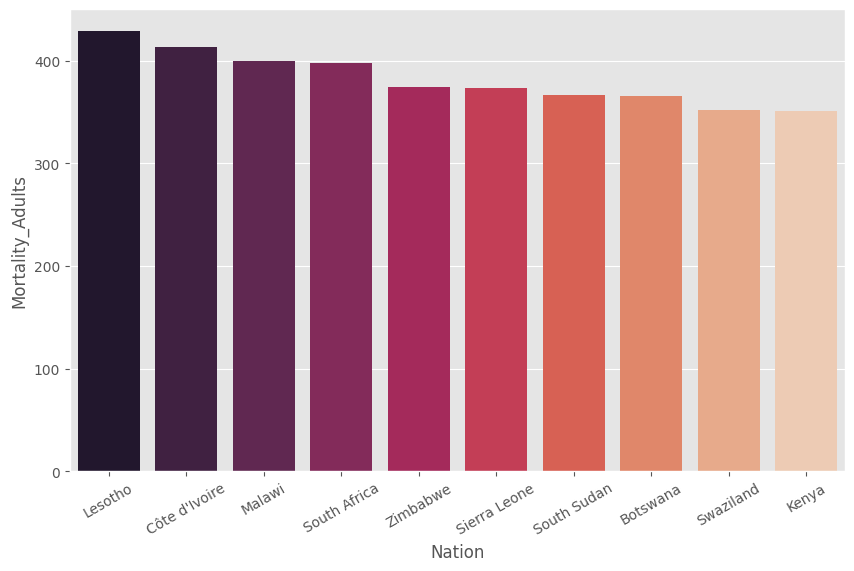

In [49]:
country_Mortality_Adults = train_set.groupby('Nation')['Mortality_Adults'].mean().reset_index()

top_countries = country_Mortality_Adults.sort_values('Mortality_Adults', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Nation', y = 'Mortality_Adults', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

plt.show()

## Lowest Mortality_Adults

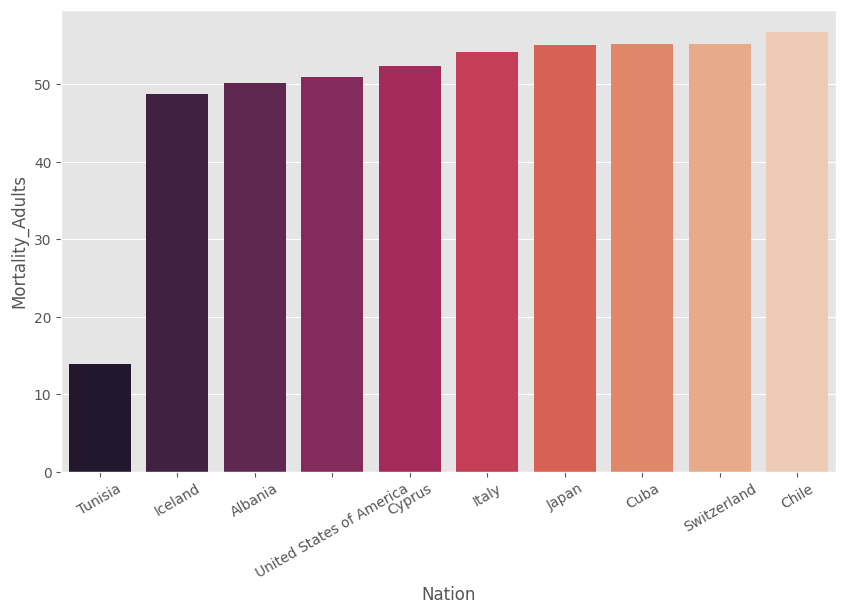

In [50]:
country_Mortality_Adults = train_set.groupby('Nation')['Mortality_Adults'].mean().reset_index()

top_countries = country_Mortality_Adults.sort_values('Mortality_Adults').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Nation', y = 'Mortality_Adults', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

plt.show()

<h1 style="color:darkred; font-size:28px;">Some Correlations and multivariarte analysis</h1>

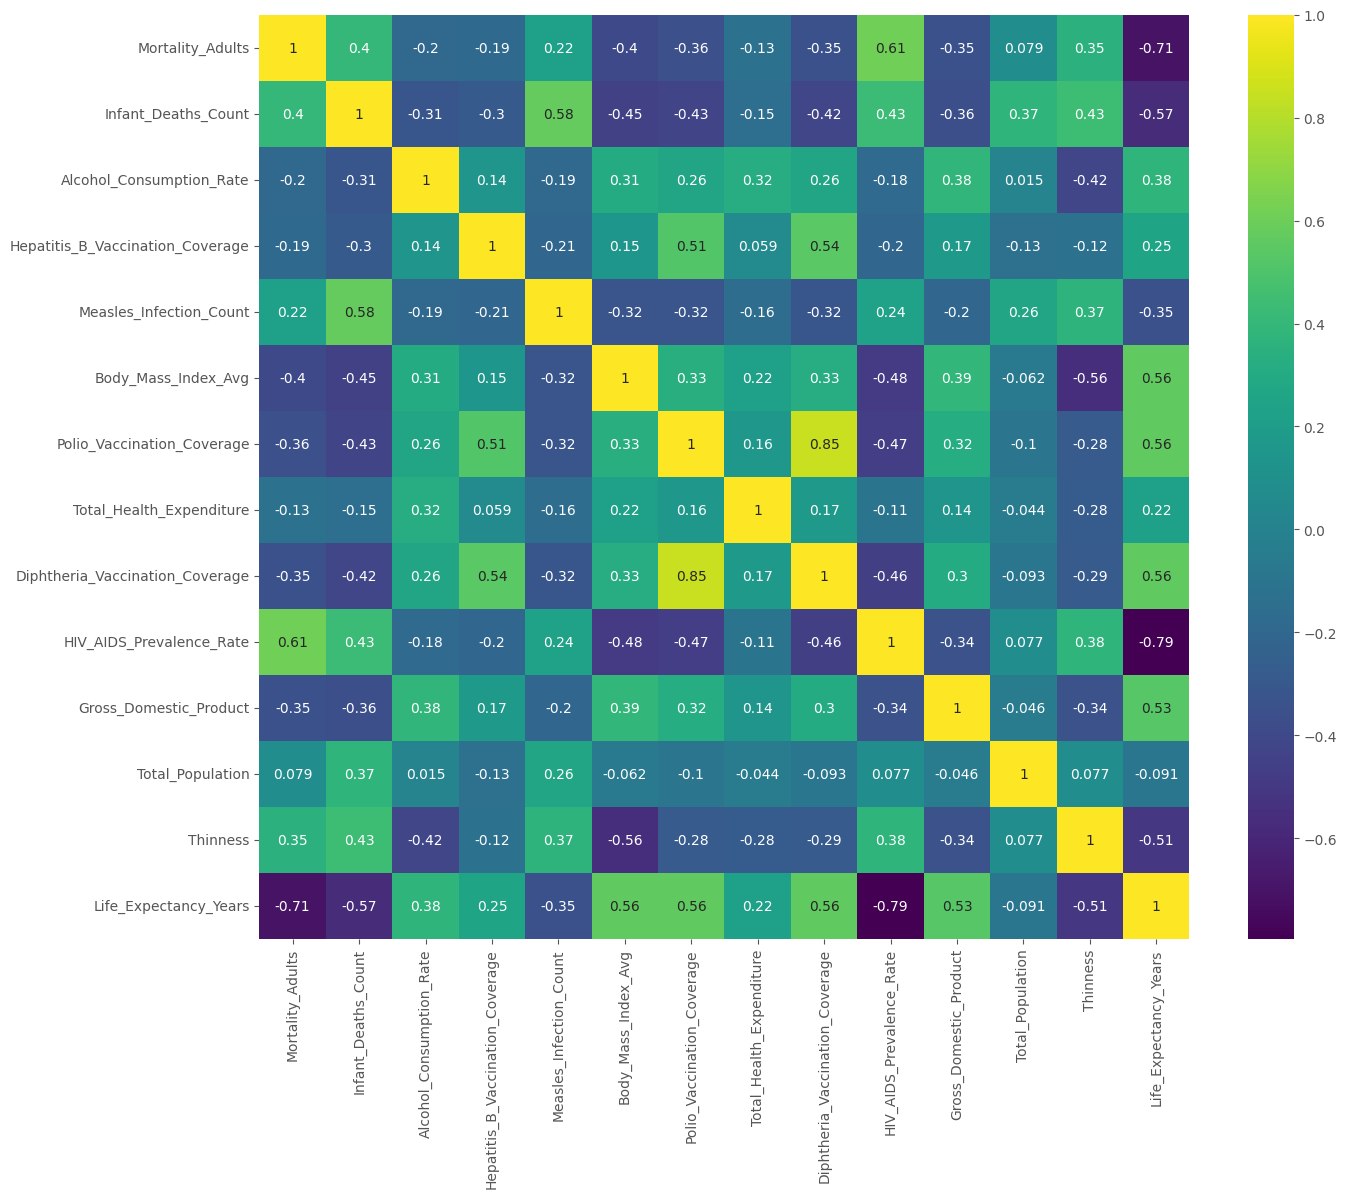

In [51]:

plt.figure(figsize=(15, 12))
sns.heatmap(train_set[num_col].corr(), cmap='viridis', annot=True)
plt.show()

### I see a strong correlation between Polio_Vaccination_Coverage  and Diphthria_vaccination 
### and negative strong correlation between HIV_AIDS_Prevalence_Rate and Life_Expectancy_Years 
### and also negative correlation between Life expectancy year and mortality adults 

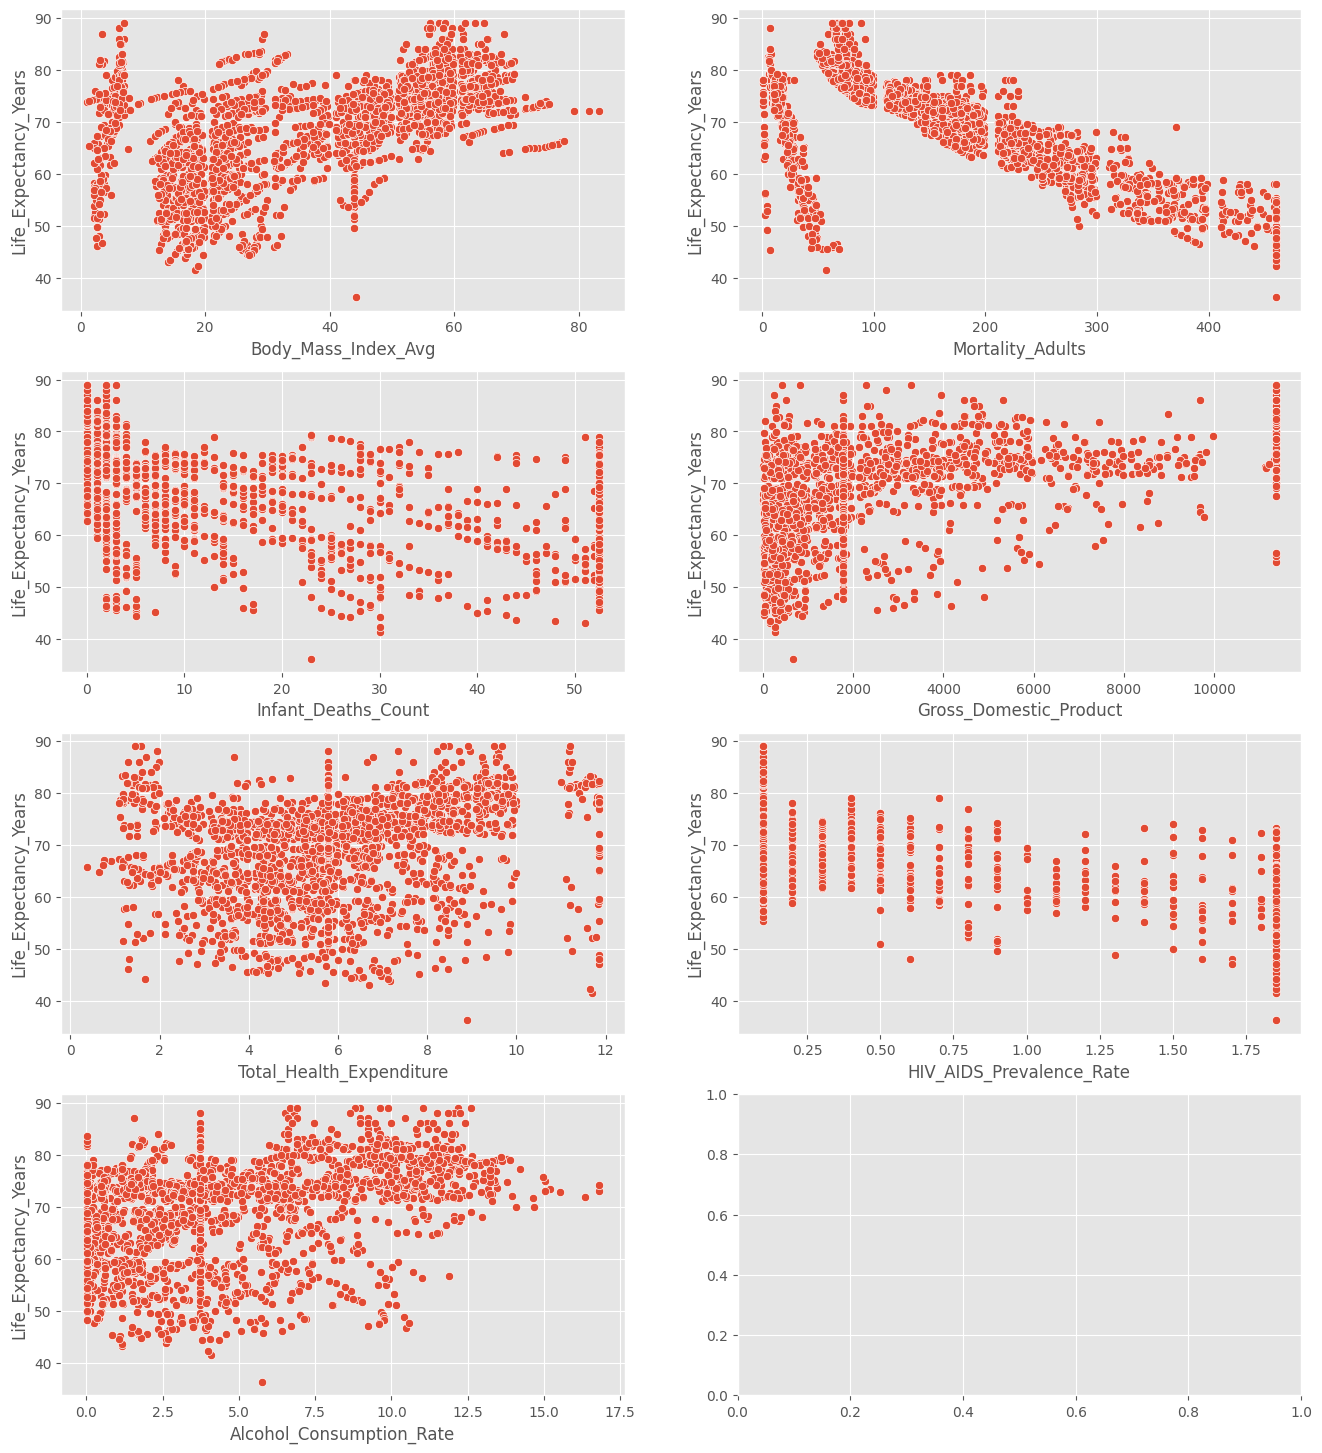

In [52]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))


sns.scatterplot(data=train_set, y='Life_Expectancy_Years', x='Body_Mass_Index_Avg', ax=axes[0, 0])
sns.scatterplot(data=train_set, y='Life_Expectancy_Years', x='Mortality_Adults', ax=axes[0, 1])
sns.scatterplot(data=train_set, y='Life_Expectancy_Years', x='Infant_Deaths_Count', ax=axes[1, 0])
sns.scatterplot(data=train_set, y='Life_Expectancy_Years', x='Gross_Domestic_Product', ax=axes[1, 1])
sns.scatterplot(data=train_set, y='Life_Expectancy_Years', x='Total_Health_Expenditure', ax=axes[2, 0])
sns.scatterplot(data=train_set, y='Life_Expectancy_Years', x='HIV_AIDS_Prevalence_Rate', ax=axes[2, 1])
sns.scatterplot(data=train_set, y='Life_Expectancy_Years', x='Alcohol_Consumption_Rate', ax=axes[3, 0])


plt .show()

<h1 style="color:darkred; font-size:28px;">Modeling</h1>

#### some notice 
train_set_copy is the set i transofrmed the train_set in  to handle the skewness of the train_set 
i tried ti use it in moding and i get me a bad result so i used the train_set without skewness handling and i get me a pretty good and normal result 

In [53]:
train_set = train_set_copy

### Scaling and encoding the train_set

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
cat_cols = train_set.select_dtypes(include = 'object').columns
for cols in cat_cols:
    train_set[cols] = le.fit_transform(train_set[cols])

In [55]:
x_train =  train_set.drop(columns='Life_Expectancy_Years')
y_train = train_set['Life_Expectancy_Years']

In [56]:
scaler = StandardScaler()
cols_to_scale = x_train.drop(columns='Country_Category').columns
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])

In [57]:
x_train.head()

,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness
456,-0.371770,0.120589,0,-0.882069,-1.207603,1.036716,0.366584,-1.138337,0.986362,0.857934,1.257750,0.862801,-0.740556,1.526862,-0.758992,-1.262151
462,0.357794,-1.170885,1,0.723701,1.450872,-1.227000,0.366584,1.283716,-1.206391,-0.209686,-1.484906,-0.546267,0.559748,-1.459591,-0.584895,1.646610
2172,-1.666745,0.120589,1,1.523380,1.450872,0.799704,-1.605286,0.969293,-0.969473,-1.395884,-0.901548,-1.166374,1.617334,0.549121,0.248995,1.210155
2667,-1.028377,1.196817,1,-0.421840,-0.603821,-0.001250,0.564677,-1.138337,1.006525,0.615331,1.549429,0.620205,-0.740556,-0.130131,-1.413672,-0.746011
381,-0.244096,1.412063,0,-0.896061,-0.282802,0.884792,0.665321,-1.138337,1.238402,0.615331,1.453654,0.620205,-0.740556,1.526862,-0.410497,-1.516088


## train and evaluation on the trainig set

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

In [59]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}


for degree in range(1, 6):  
    poly_model_name = f'Polynomial Regression (Degree {degree})'
    models[poly_model_name] = make_pipeline(PolynomialFeatures(degree), LinearRegression())


results = []


for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    rmse = mean_squared_error(y_train, y_pred, squared=False)
    r2 = r2_score(y_train, y_pred)
    
    results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})


results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R2 Score
0,Random Forest,7.280226e-01,0.994084
1,Extra Trees Regressor,1.337159e-04,1.000000
2,GradientBoost Regressor,2.002980e+00,0.955222
3,XGB Regressor,2.379262e-01,0.999368
4,Linear Regression,4.202001e+00,0.802928
5,Polynomial Regression (Degree 1),4.202001e+00,0.802928
6,Polynomial Regression (Degree 2),2.707620e+00,0.918175
7,Polynomial Regression (Degree 3),1.622808e+00,0.970607
8,Polynomial Regression (Degree 4),4.919876e-13,1.000000
9,Polynomial Regression (Degree 5),1.898513e-13,1.000000


## R2 score  on the trainig set 

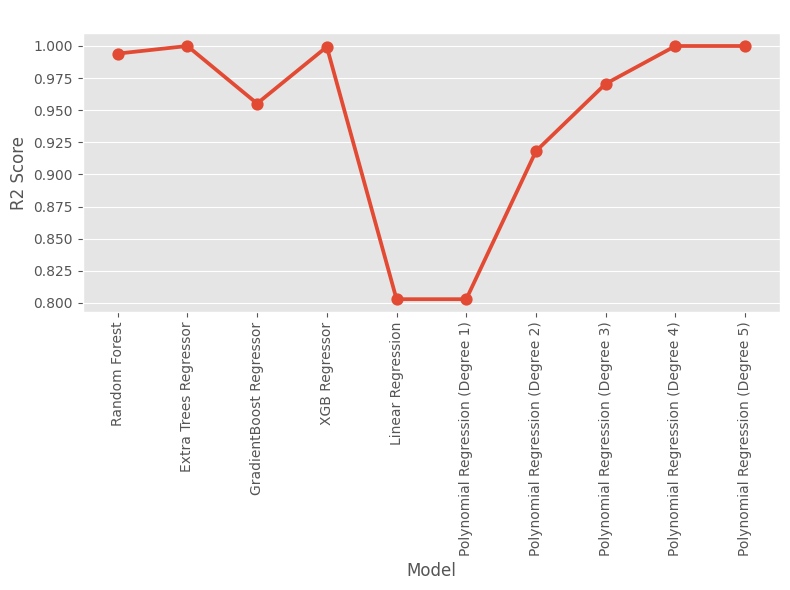

In [60]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='R2 Score',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

## RMSE error on the trainig set 

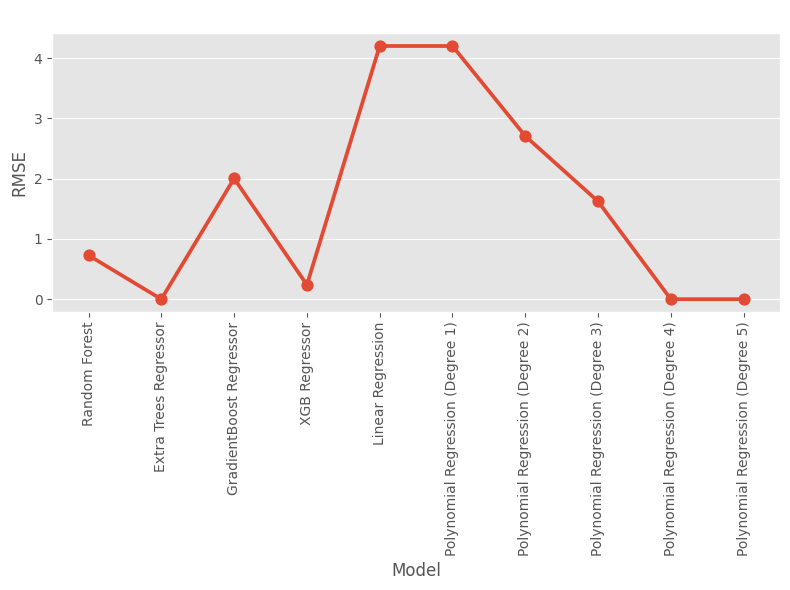

In [61]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='RMSE',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

## evaluation using cross validation

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

def rmse_scorer(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)


rmse_score = make_scorer(rmse_scorer, greater_is_better=False)


models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

for degree in range(1, 6):  
    poly_model_name = f'Polynomial Regression (Degree {degree})'
    models[poly_model_name] = make_pipeline(PolynomialFeatures(degree), LinearRegression())

results = []


for model_name, model in models.items():
    
    cv_rmse = cross_val_score(model, x_train, y_train, cv=5, scoring=rmse_score)
    mean_rmse = - np.mean(cv_rmse)  
    cv_r2 = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    mean_r2 = np.mean(cv_r2)
    
    
    results.append({'Model': model_name, 'Mean RMSE': mean_rmse, 'Mean R2 Score': mean_r2})


results_df_cv = pd.DataFrame(results)
results_df_cv


,Model,Mean RMSE,Mean R2 Score
0,Random Forest,2.080178,0.951072
1,Extra Trees Regressor,1.918487,0.958538
2,GradientBoost Regressor,2.466475,0.931106
3,XGB Regressor,2.059091,0.952201
4,Linear Regression,4.233687,0.798767
5,Polynomial Regression (Degree 1),4.233687,0.798767
6,Polynomial Regression (Degree 2),2.947941,0.901861
7,Polynomial Regression (Degree 3),5.146466,0.692076
8,Polynomial Regression (Degree 4),28.562343,-12.356042
9,Polynomial Regression (Degree 5),12.580725,-1.363345


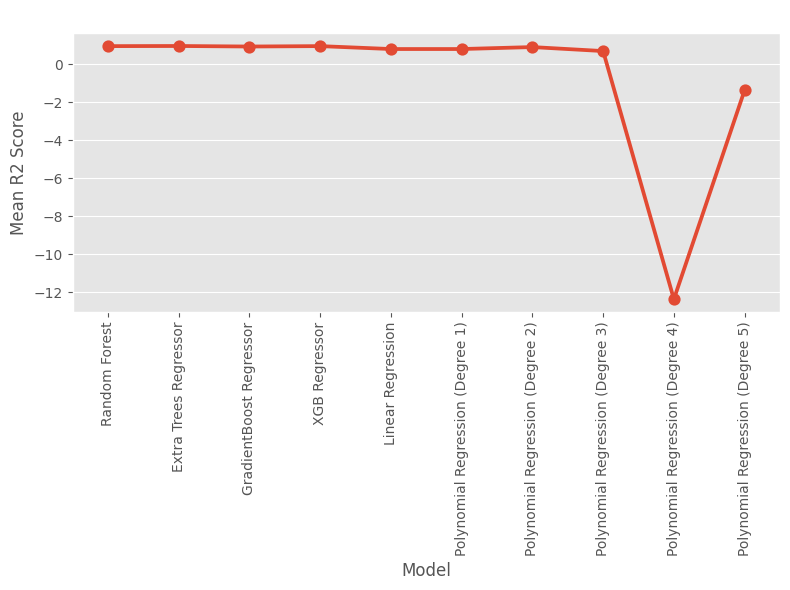

In [63]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean R2 Score',data=results_df_cv)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

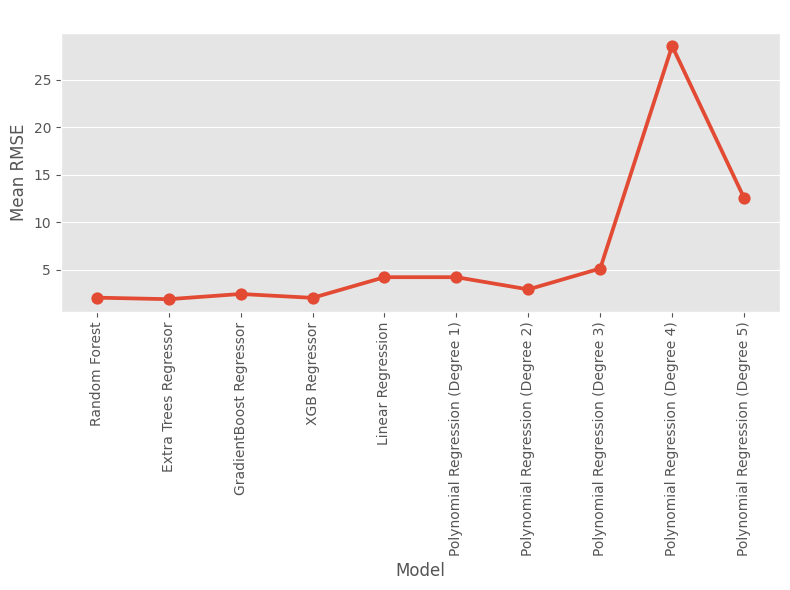

In [64]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean RMSE',data=results_df_cv)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

## Validation vs Train

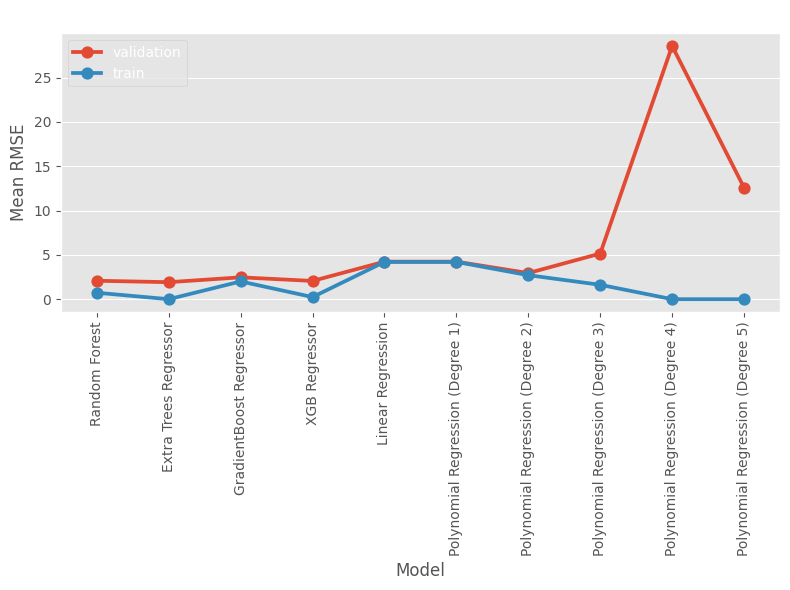

In [65]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean RMSE',data=results_df_cv,label="validation")
sns.pointplot(x='Model',y='RMSE',data=results_df,label="train")
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.legend()
plt.tight_layout()
plt.style.use('bmh')


plt.show()

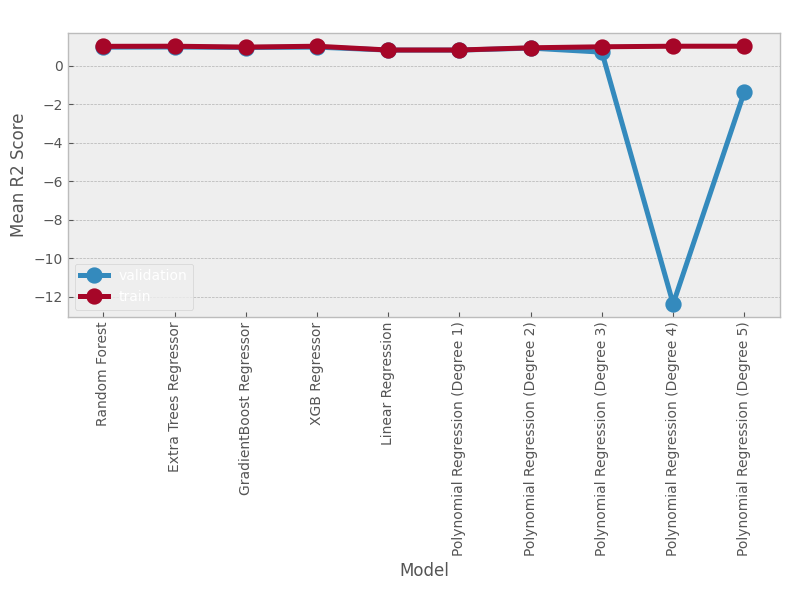

In [66]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean R2 Score',data=results_df_cv,label="validation")
sns.pointplot(x='Model',y='R2 Score',data=results_df,label="train")
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.legend()
plt.tight_layout()

plt.show()

### it seems that the random forest is the best model doing very good on both the validation and train and show no overfit


In [67]:
Best_model =  RandomForestRegressor(random_state=42)
Best_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### making a pipeline

In [68]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

categorical_features = cat_cols
numerical_features = ['Survey_Year', 'Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate', 
                      'Hepatitis_B_Vaccination_Coverage', 'Measles_Infection_Count', 'Body_Mass_Index_Avg', 
                      'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 
                      'HIV_AIDS_Prevalence_Rate', 'Gross_Domestic_Product', 'Total_Population', 'Thinness']

def handle_outliers(X):
    X = X.copy()
    for col in X.columns:
        q1 = X[col].quantile(0.25)
        q3 = X[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        X[col] = X[col].clip(lower_bound, upper_bound)
    return X

outlier_transformer = FunctionTransformer(handle_outliers)


def label_encode_and_scale(X):
    X_encoded = X.copy()
    for col in X_encoded.columns:
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])
    return StandardScaler().fit_transform(X_encoded)

categorical_preprocessor = FunctionTransformer(label_encode_and_scale)


def fillna_median(X):
    X = X.copy()
    for col in X.columns:
        X[col] = X[col].fillna(X[col].median())  # Fill missing values with median
    return X

def square(X):
    return X**2
fill_na =FunctionTransformer(fillna_median)

square_transformer = FunctionTransformer(square)  # Square transformation for negative skew
yeo_transformer = PowerTransformer(method='yeo-johnson')  # Yeo-Johnson for positive skew

skewness_preprocessor = ColumnTransformer(
    transformers=[
        ('square', square_transformer, negative_skewed),
        ('yeo', yeo_transformer, positive_skewed)
    ],
    remainder='passthrough'
)

numerical_preprocessor = Pipeline(steps=[
    ('fillna', fill_na), 
    ('outlier_handling', outlier_transformer),   
    ('skewness_handling', skewness_preprocessor),
    ('scaling', StandardScaler())                                 
                   
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_features),
        ('cat', categorical_preprocessor, categorical_features)
    ]
)


random_forest_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Best_model) 
])


### fit the pipeline

In [69]:
copy_1_x =  copy_1.drop(columns='Life_Expectancy_Years')
copy_1_y = copy_1['Life_Expectancy_Years']
copy_1_y.fillna(copy_1_y.median(), inplace=True)
random_forest_final.fit(copy_1_x,copy_1_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('fillna',
                                                                   FunctionTransformer(func=<function fillna_median at 0x000001DF5D15A200>)),
                                                                  ('outlier_handling',
                                                                   FunctionTransformer(func=<function handle_outliers at 0x000001DF5D15A160>)),
                                                                  ('skewness_handling',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('square',
                                                                                                    Fu...
                                                   'Polio_Vaccination_Coverage',
                                                   'Total_Health_Expenditure',
                                                   'Diphtheria_Vaccination_Coverage',
                                                   'HIV_AIDS_Prevalence_Rate',
                                                   'Gross_Domestic_Product',
                                                   'Total_Population',
                                                   'Thinness']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function label_encode_and_scale at 0x000001DF5D159DA0>),
                                                  Index(['Nation', 'Country_Category'], dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

## hyper parameter fine tunning 
we tried hardly to fine tune the performance but it stil the same rmse

In [70]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# import pandas as pd

# # Initialize the Random Forest model
# random_forest_model = random_forest_final

# # Define the parameter grid for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'model__bootstrap': [True, False]
}
# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=random_forest_model,
#     param_grid=param_grid,
#     cv=3,  # 3-fold cross-validation
#     scoring='neg_root_mean_squared_error',  # Optimizing for RMSE
#     verbose=2,
#     n_jobs=-1  # Utilize all CPUs
# )

# # Fit the GridSearchCV on the data
# grid_search.fit(copy_1_x, copy_1_y)

# # Display the best parameters and corresponding score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Negative RMSE):", grid_search.best_score_)

# # Convert cross-validation results to a DataFrame for detailed analysis
# cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_results.head()


In [71]:
# random_forest_tunning = grid_search.best_estimator_
# cv_results['mean_test_score'] = - cv_results['mean_test_score']
# cv_results.head()

## test set 

In [72]:
test_set

,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
2546,Sierra Leone,2001.0,Developing,519.0,30,4.21,33.346915,NaN,649.0,17.5,38.0,11.83,38.0,1.5,227.779471,4739147.0,1.1,41.0
650,United Kingdom of Great Britain and Northern I...,2003.0,Developed,86.0,4,11.85,0.000000,NaN,460.0,59.5,91.0,7.81,91.0,0.1,NaN,NaN,0.7,78.3
1740,Tunisia,2012.0,Developing,13.0,3,1.30,585.877676,97.0,48.0,58.3,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,74.9
177,Sao Tome and Principe,NaN,Developing,224.0,0,5.07,0.000000,NaN,0.0,2.7,87.0,8.86,82.0,1.5,NaN,13866.0,8.0,62.6
1377,Jordan,2006.0,Developing,121.0,4,0.59,313.362601,98.0,1.0,58.6,98.0,8.80,98.0,0.1,2537.349000,5934232.0,3.9,72.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Grenada,2009.0,Developing,158.0,0,8.42,146.438449,99.0,0.0,43.1,99.0,6.24,99.0,0.1,7395.881250,NaN,3.8,72.4
1405,Bosnia and Herzegovina,2007.0,Developing,16.0,0,5.16,8.240356,94.0,166.0,51.5,95.0,8.37,95.0,0.1,418.292176,3774.0,2.8,75.4
962,Cyprus,2008.0,Developed,62.0,0,12.01,239.640994,93.0,1.0,56.8,97.0,6.89,97.0,0.1,3539.748800,181563.0,0.9,79.1
2658,Armenia,2013.0,Developing,123.0,1,3.79,279.429081,95.0,10.0,53.3,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,74.4


In [73]:
per_col=['Mortality_Adults']
percent_col= ['Alcohol_Consumption_Rate', 'Expenditure_Percentage_GDP', 'Hepatitis_B_Vaccination_Coverage', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Thinness']

for col in per_col:
        test_set.loc[test_set[col] > 1000, col] = np.nan

for col in percent_col:
        test_set.loc[test_set[col] > 100, col] = np.nan

In [74]:
test_set.isna().sum()

Nation                                0
Survey_Year                           2
Country_Category                      0
Mortality_Adults                      4
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate             44
Expenditure_Percentage_GDP          253
Hepatitis_B_Vaccination_Coverage    104
Measles_Infection_Count               0
Body_Mass_Index_Avg                   8
Polio_Vaccination_Coverage            5
Total_Health_Expenditure             49
Diphtheria_Vaccination_Coverage       5
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product               94
Total_Population                    131
Thinness                              8
Life_Expectancy_Years                 3
dtype: int64

In [75]:
test_set.drop(columns = 'Expenditure_Percentage_GDP',inplace = True)

In [76]:
test_set['Survey_Year'].dropna(inplace=True)

In [77]:
x_test =  test_set.drop(columns='Life_Expectancy_Years')
y_test = test_set['Life_Expectancy_Years']

In [78]:
# Fill missing values with the median
y_test.fillna(y_test.median(), inplace=True)



## evaluate the model on the test set 

In [79]:
y_test_pred = random_forest_final.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

# Calculate R-squared (R² score)
r2 = r2_score(y_test, y_test_pred)
print("R² score:", r2)

# print("===============================================")

# y_test_pred_tn = random_forest_tunning.predict(x_test)
# rmse_tn = np.sqrt(mean_squared_error(y_test, y_test_pred))
# print("RMSE_tn:", rmse_tn)

# # Calculate R-squared (R² score)
# r2_tn = r2_score(y_test, y_test_pred_tn)
# print("R² score_tn:", r2_tn)

RMSE: 2.1438247545523157
R² score: 0.9509448012561477


In [80]:
new_train_set = pd.DataFrame({
    'Survey_Year': [2006],
    'Mortality_Adults': [123],
    'Infant_Deaths_Count': [8],
    'Alcohol_Consumption_Rate': [.97],
    'Hepatitis_B_Vaccination_Coverage': [83],
    'Measles_Infection_Count': [517],
    'Body_Mass_Index_Avg': [48.5],
    'Polio_Vaccination_Coverage': [83],
    'Total_Health_Expenditure': [3.78],
    'Diphtheria_Vaccination_Coverage': [8],
    'HIV_AIDS_Prevalence_Rate': [0.1],
    'Gross_Domestic_Product': [1762.24617],
    'Total_Population': [18914977],
    'Thinness': [6.4],
    'Nation': ['Syrian Arab Republic'],  
    'Country_Category': ['Developing']
})

pred = random_forest_final.predict(new_train_set)
pred

array([73.464])

## save the model 

In [81]:
import pickle

with open('life_expectancy.sav', 'wb') as file:
    pickle.dump({'pipeline': random_forest_final}, file)

In [82]:
loaded_objects = pickle.load(open('life_expectancy.sav','rb'))

In [83]:
final_model = loaded_objects


In [84]:
categorical_features

Index(['Nation', 'Country_Category'], dtype='object')